In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
np.random.seed(781994)

In [3]:
raw_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
raw_df.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1


In [5]:
raw_df["id"].nunique() == len(raw_df)

True

In [6]:
df = raw_df.drop(columns="id")

In [7]:
df.isna().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [8]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df["bmi"].isna().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

In [10]:
df[df["bmi"].isna()]["stroke"].value_counts()

0    161
1     40
Name: stroke, dtype: int64

In [11]:
df["stroke"].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [12]:
# dataset is highly imbalanced, but these data points seem to be important

In [13]:
df.groupby('stroke')['bmi'].mean()

stroke
0    28.823064
1    30.471292
Name: bmi, dtype: float64

In [14]:
df.groupby('stroke')['bmi'].transform('mean')

0       30.471292
1       30.471292
2       30.471292
3       30.471292
4       30.471292
          ...    
5105    28.823064
5106    28.823064
5107    28.823064
5108    28.823064
5109    28.823064
Name: bmi, Length: 5110, dtype: float64

In [15]:
# impute
df['bmi'] = df['bmi'].fillna(df.groupby('stroke')['bmi'].transform('mean'))

In [16]:
df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   420
smoking_status          4
stroke                  2
dtype: int64

In [17]:
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'stroke']

In [18]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

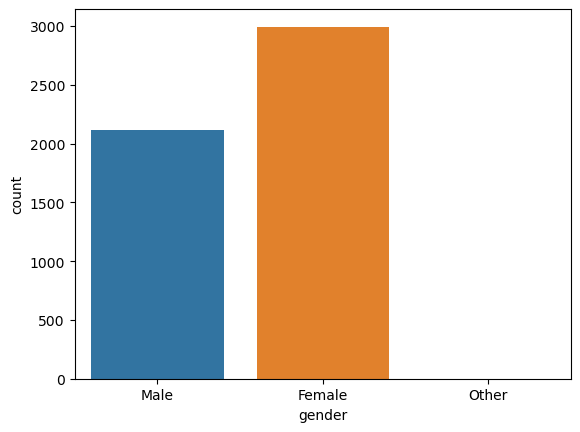

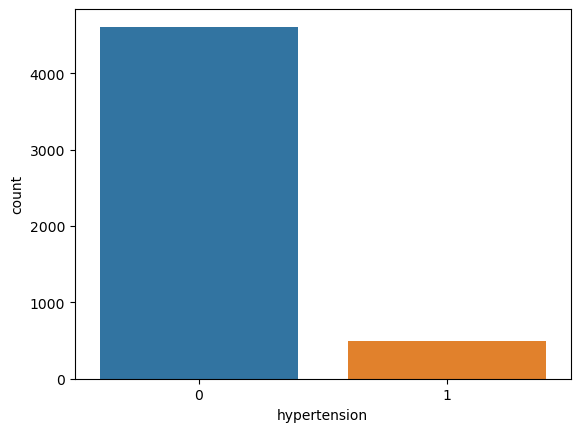

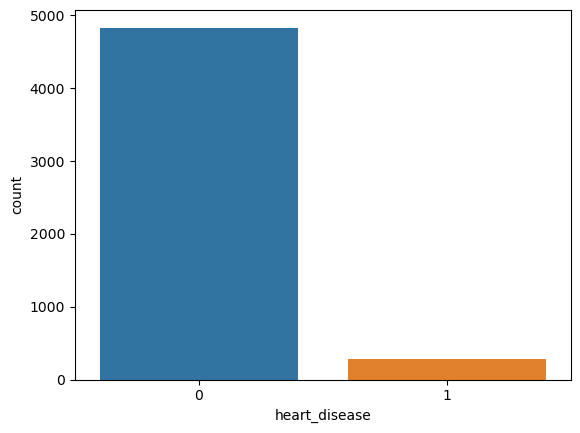

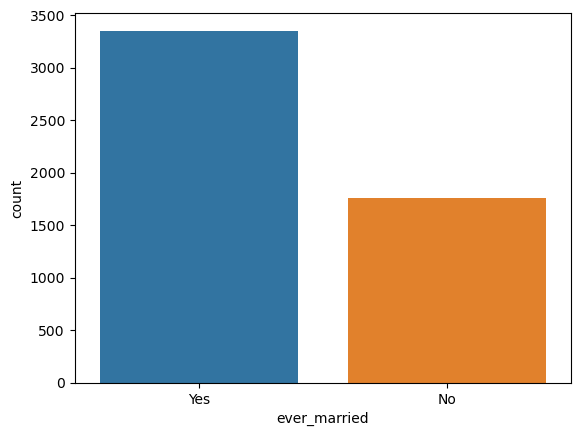

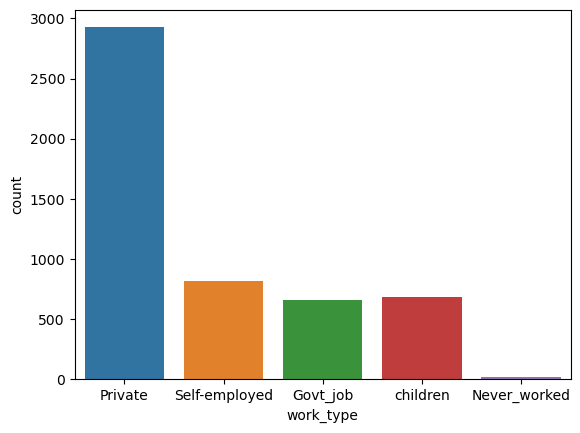

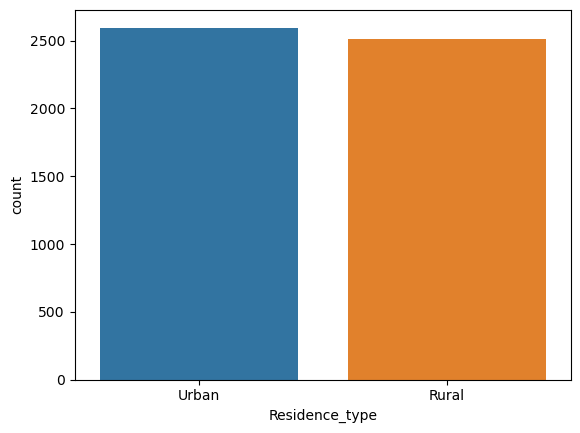

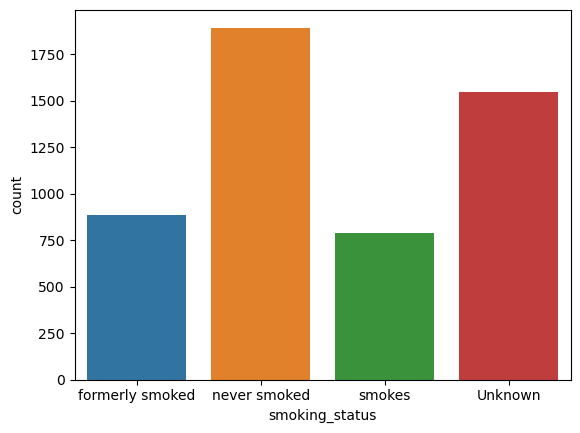

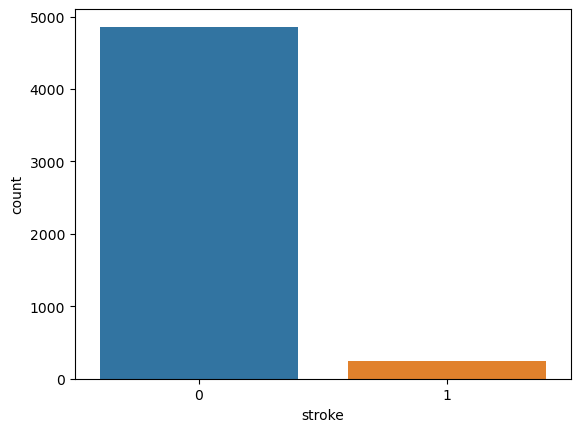

In [19]:
for cat_col in categorical_cols:
    plt.figure()
    sns.countplot(x=df[cat_col])

<Figure size 640x480 with 0 Axes>

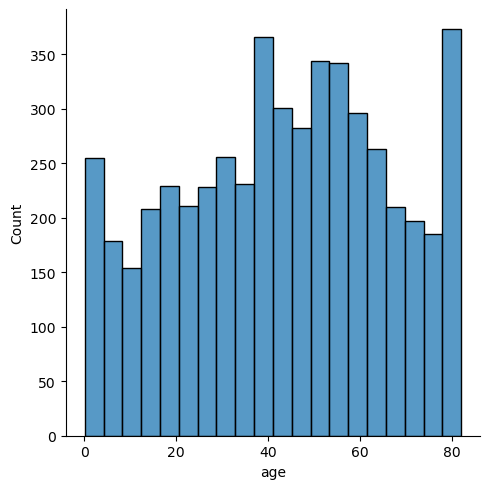

<Figure size 640x480 with 0 Axes>

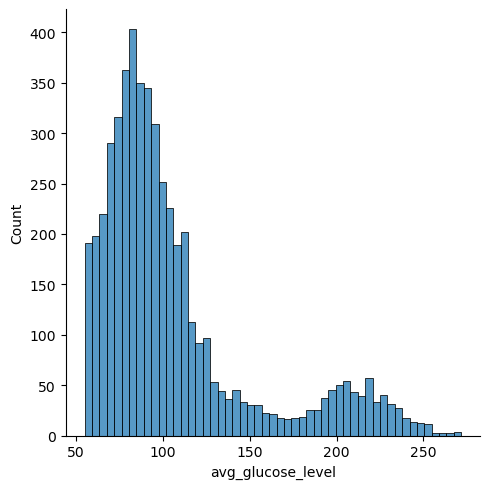

<Figure size 640x480 with 0 Axes>

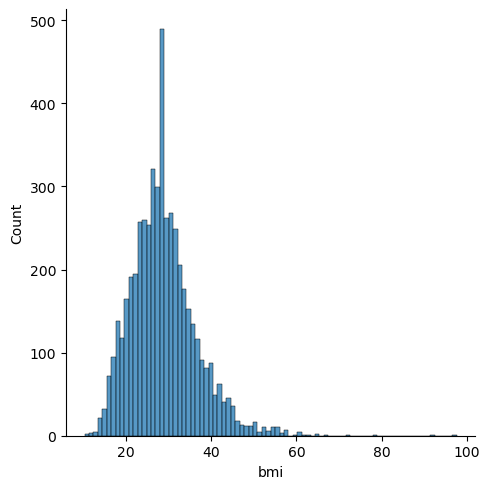

In [20]:
for num_col in numerical_cols:
    plt.figure()
    sns.displot(x=df[num_col])

In [21]:
# avg glucose level - right skewed?
# maybe needs transformation if a non tree based model is used

/var/folders/wn/xmcbx3pn7pd9dlgs5nc38hp00000gn/T/ipykernel_28552/2667118442.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[numerical_cols],shade=True,palette='rocket')


Text(0.5, 1.0, 'Kde Plots for age, avg_glucose_level and bmi')

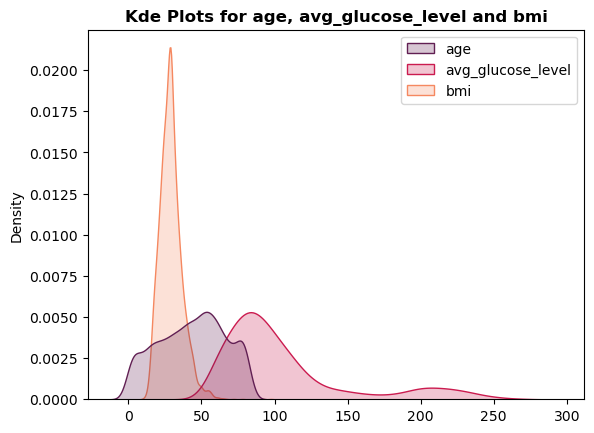

In [22]:
sns.kdeplot(data=df[numerical_cols],shade=True,palette='rocket')
plt.title('Kde Plots for age, avg_glucose_level and bmi',weight='bold')

<Axes: >

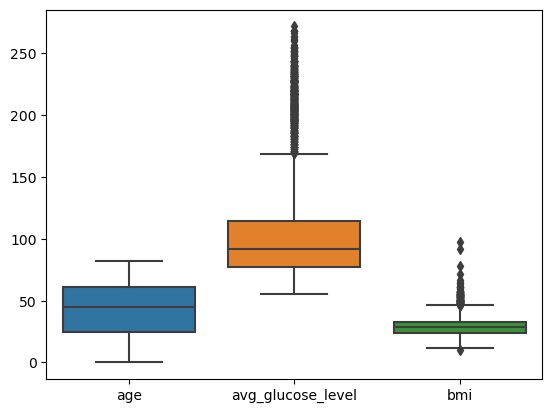

In [23]:
sns.boxplot(df[numerical_cols])

<Axes: >

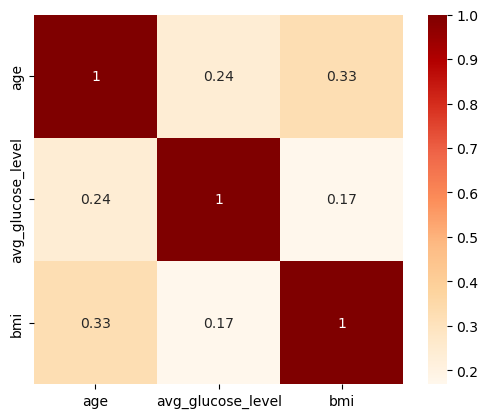

In [24]:
# heatmap of numerical data
corr = df[numerical_cols].corr()
sns.heatmap(data=corr,annot=True, cmap="OrRd",square=True)  

In [25]:
# feature engineering
df["age"].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [26]:
df["age"].min(), df["age"].max()

(0.08, 82.0)

<Axes: xlabel='age', ylabel='count'>

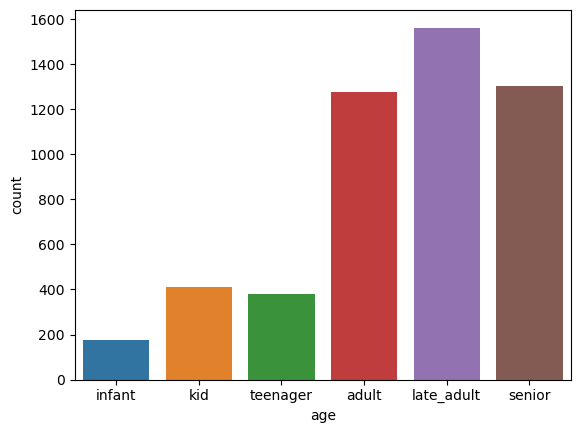

In [27]:
# feature engineering - binned age
bins = [0, 2, 12, 19, 40, 60, df["age"].max()]
labels = ["infant", "kid", "teenager", "adult", "late_adult", "senior"]
binned_age = pd.cut(df['age'], bins, labels=labels)
df["binned_age"] = binned_age
sns.countplot(x=binned_age)

In [28]:
categorical_cols += ["binned_age"]

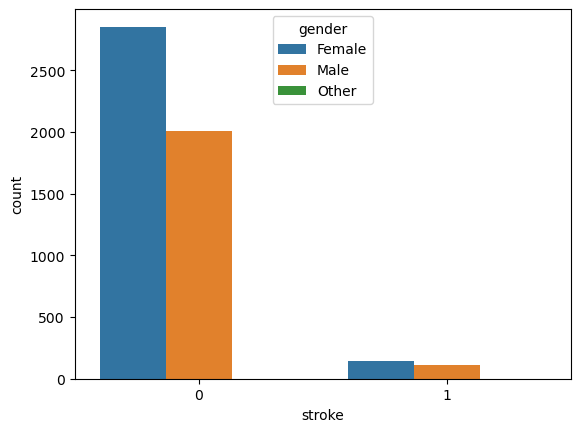

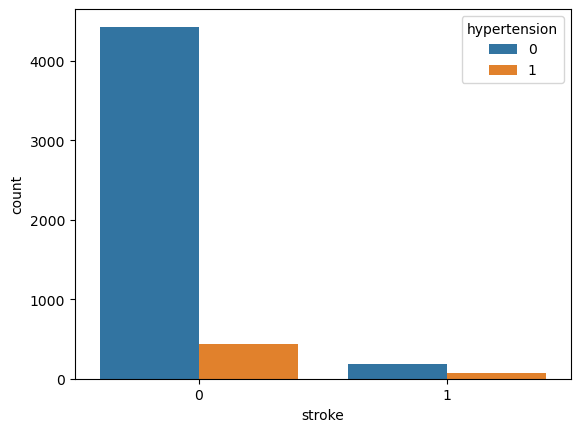

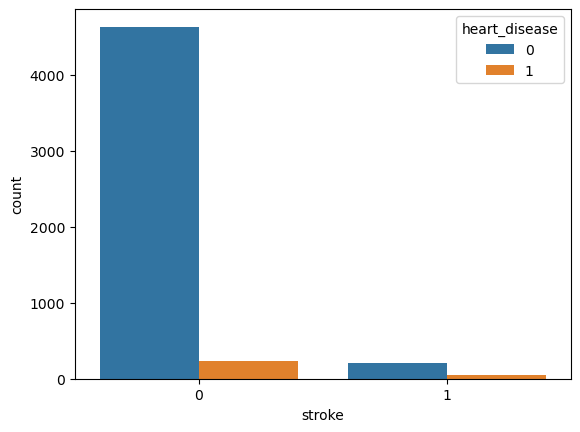

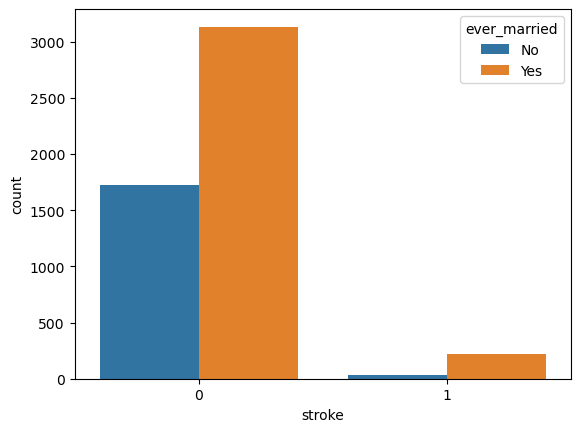

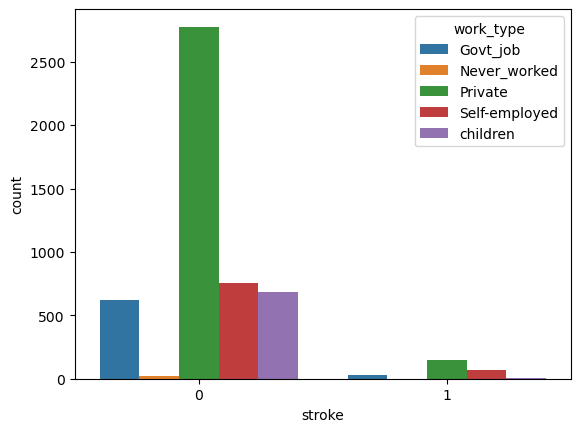

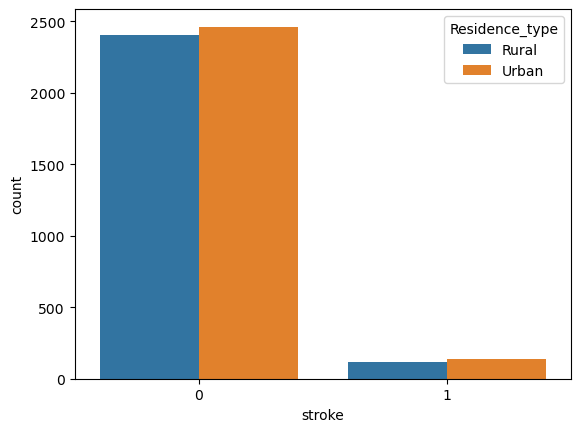

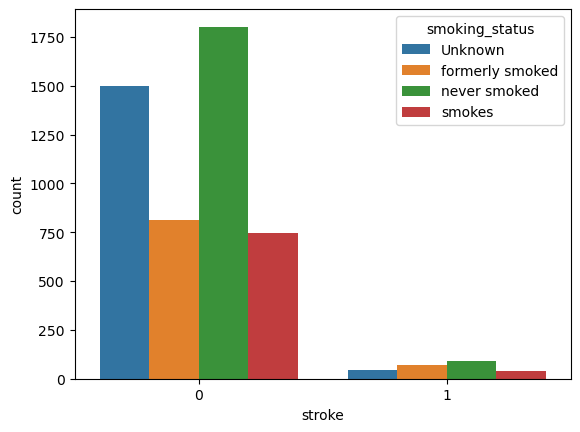

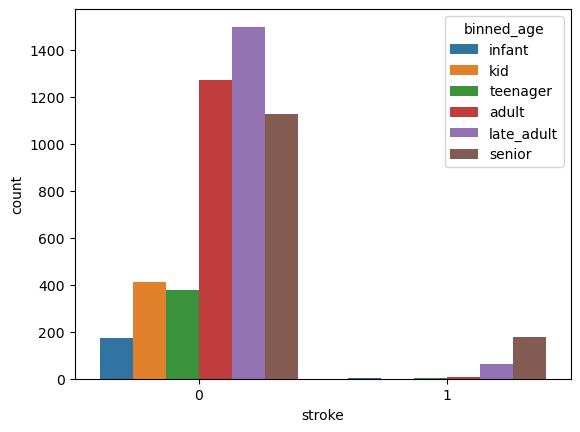

In [29]:
for col in categorical_cols:
    if col == "stroke":
        continue
    counts = df.groupby([col, 'stroke']).size().reset_index(name='count')
    plt.figure()
    sns.barplot(counts, x="stroke", y="count", hue=col)

In [30]:
counts = df.groupby(['heart_disease', 'stroke']).size().reset_index(name='count')
counts

,heart_disease,stroke,count
0,0,0,4632
1,0,1,202
2,1,0,229
3,1,1,47


<Axes: xlabel='stroke', ylabel='count'>

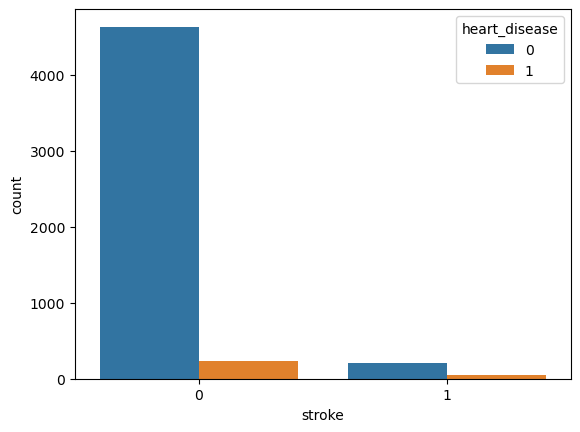

In [31]:
# heart disease looks important
sns.barplot(counts, x="stroke", y="count", hue="heart_disease")

In [32]:
# prepare_for_modeling

In [33]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,binned_age
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,senior
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,30.471292,never smoked,1,senior
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,senior
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,late_adult
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,senior
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.823064,never smoked,0,senior
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0,senior
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0,adult
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0,late_adult


In [34]:
df[categorical_cols].dtypes

gender              object
hypertension         int64
heart_disease        int64
ever_married        object
work_type           object
Residence_type      object
smoking_status      object
stroke               int64
binned_age        category
dtype: object

In [35]:
df["gender"].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [36]:
df[df["gender"] == "Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,binned_age
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,adult


In [37]:
# remove 1 row, it's also stroke 0
preprocessed_df = df[df["gender"] != "Other"].copy()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
target = "stroke"
X = preprocessed_df[[col for col in preprocessed_df.columns if col != target]]
y = preprocessed_df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

In [40]:
y_train.value_counts()

0    3888
1     199
Name: stroke, dtype: int64

In [41]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
# not using MinMaxScalar because tree based model

In [42]:
preprocessed_df.nunique()

gender                  2
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3978
bmi                   420
smoking_status          4
stroke                  2
binned_age              6
dtype: int64

In [43]:
binary_or_ordinal_cols = ["gender", "ever_married", "Residence_type", "smoking_status", "binned_age"]
onehot_cols = ["work_type"]
categories = [
    ['Female', 'Male'],
    ['No', 'Yes'],
    ['Rural', 'Urban'],
    ['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
    ['infant', 'kid', 'teenager', 'adult', 'late_adult', 'senior'],
]
ordinal_encoder = OrdinalEncoder(categories=categories)
onehot_encoder = OneHotEncoder(drop="if_binary")
result = ordinal_encoder.fit_transform(X_train[binary_or_ordinal_cols])

In [44]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Urban'], dtype=object),
 array(['never smoked', 'Unknown', 'formerly smoked', 'smokes'],
       dtype=object),
 array(['infant', 'kid', 'teenager', 'adult', 'late_adult', 'senior'],
       dtype=object)]

In [45]:
X_train[binary_or_ordinal_cols] = result

In [46]:
X_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,binned_age
1246,1.0,2.0,0,0,0.0,children,1.0,76.25,20.1,1.0,0.0
5072,0.0,35.0,0,0,1.0,Private,0.0,58.72,40.0,3.0,3.0
3090,0.0,50.0,0,0,1.0,Govt_job,0.0,120.05,27.4,1.0,4.0
138,1.0,76.0,1,0,1.0,Self-employed,0.0,194.37,27.0,2.0,5.0
4316,1.0,30.0,0,0,0.0,Private,1.0,113.08,41.8,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
3025,0.0,16.0,0,0,0.0,Private,0.0,81.92,22.7,1.0,2.0
1193,0.0,55.0,0,1,0.0,Private,0.0,109.69,22.2,3.0,4.0
3325,0.0,34.0,0,0,1.0,Private,0.0,112.54,23.4,2.0,3.0
1237,0.0,33.0,0,0,1.0,Govt_job,0.0,76.66,24.8,0.0,3.0


In [47]:
onehot_result = onehot_encoder.fit_transform(X_train[onehot_cols])

In [48]:
onehot_encoder.get_feature_names_out()

array(['work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'work_type_children'], dtype=object)

In [49]:
X_train = X_train.drop(columns=onehot_cols)
X_train[onehot_encoder.get_feature_names_out()] = onehot_result.toarray()

In [50]:
X_train.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,binned_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
1246,1.0,2.0,0,0,0.0,1.0,76.25,20.1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
5072,0.0,35.0,0,0,1.0,0.0,58.72,40.0,3.0,3.0,0.0,0.0,1.0,0.0,0.0
3090,0.0,50.0,0,0,1.0,0.0,120.05,27.4,1.0,4.0,1.0,0.0,0.0,0.0,0.0


In [51]:
# new: scale due to smote and logistic reg
from sklearn.preprocessing import StandardScaler
X_train_pre_scaled = X_train.copy()
scaler = StandardScaler()
X_train[:] = scaler.fit_transform(X_train_pre_scaled)

In [52]:
#new: smote
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train, y_train = sm.fit_resample(X_train, y_train)

In [53]:
X_train.shape

(7776, 15)

In [54]:
# same work for test, but use transform

In [55]:
def transform_test(X_test):
    X_test = X_test.copy()
    test_result = ordinal_encoder.transform(X_test[binary_or_ordinal_cols])
    X_test[binary_or_ordinal_cols] = test_result
    onehot_test_result = onehot_encoder.transform(X_test[onehot_cols])
    X_test = X_test.drop(columns=onehot_cols)
    X_test[onehot_encoder.get_feature_names_out()] = onehot_test_result.toarray()
    X_test[:] = scaler.transform(X_test)
    return X_test

In [56]:
X_test = transform_test(X_test)

In [57]:
X_test.head(3)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,binned_age,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
3946,-0.842640,-1.419147,-0.321561,-0.237946,-1.373426,-1.023521,-0.277594,-1.057377,-0.102208,-1.836027,-0.382233,-0.070126,-1.170747,-0.428895,2.541265
1714,1.186747,-1.552050,-0.321561,-0.237946,-1.373426,0.977020,-0.106370,0.633785,-0.102208,-1.836027,-0.382233,-0.070126,-1.170747,-0.428895,2.541265
1810,-0.842640,1.549029,-0.321561,4.202630,0.728106,-1.023521,-0.379445,0.698830,-0.102208,1.140803,-0.382233,-0.070126,-1.170747,2.331570,-0.393505


In [58]:
X_test.shape

(1022, 15)

In [59]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score, auc
from scipy import stats


def plot_roc_auc_pr(estimator):
    y_scores = estimator.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    precision, recall, _ = precision_recall_curve(y_test, y_scores)

    fpr, tpr, thresholds_roc = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    cm = confusion_matrix(y_test, estimator.predict(X_test))

    # Calculate the parameters of the PR curve
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_scores)
    pr_auc = auc(recall, precision)

    # Sort the ground truth labels according to the predicted scores
    sorted_indices = np.argsort(y_scores)
    sorted_y_true = np.array(y_test)[sorted_indices]

    # Calculate the parameters of the Lorenz curve
    n = len(sorted_y_true)
    total_positives = np.sum(sorted_y_true)
    fraction_positives = np.cumsum(sorted_y_true) / total_positives
    fraction_population = np.arange(1, n + 1) / n

    # Calculate the diagonal
    diagonal = np.linspace(0, 1, n)
#     fig, axs = plt.subplots(1, 3, figsize=(22, 6))
    fig, axs = plt.subplots(2, 2, figsize=(22, 12))
    
    # pretty confusion matrix
    sns.heatmap(
        cm,
        cmap = 'Blues',
        annot = True,
        fmt = 'd',
        linewidths = 5,
        cbar = False,
        square=True,
        annot_kws = {'fontsize': 15}, 
        yticklabels = ['No stroke', 'Stroke'],
        xticklabels = ['Predicted no stroke', 'Predicted stroke'],
        ax=axs[0][0]
    )
#     sns.regplot(x, y, ax=ax1)
#     axs[0][0].plot(fpr, tpr, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
#     axs[0][0].legend(loc = 'lower right')
#     axs[0][0].plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
#     axs[0][0].axis('tight')
#     axs[0][0].set_ylabel('True Positive Rate')
#     axs[0][0].set_xlabel('False Positive Rate')
#     axs[0][0].set_title('Confusion Matrix')
#     axs[0][0].legend()

    # Draw the Lorenz curve
    axs[1][0].plot(fraction_population, fraction_positives, label='Lorentz curve')
    axs[1][0].plot(fraction_population, diagonal, 'k--', label='Equality line')
    axs[1][0].set_xlabel('Fraction of population')
    axs[1][0].set_ylabel('Cumulative fraction of positives')
    axs[1][0].set_title('Lorentz Curve')
    axs[1][0].legend()

    # Draw the ROC curve
    axs[0][1].plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
    axs[0][1].plot([0, 1], [0, 1], 'k--')
    axs[0][1].set_xlim([0.0, 1.0])
    axs[0][1].set_ylim([0.0, 1.05])
    axs[0][1].set_xlabel('False Positive Rate')
    axs[0][1].set_ylabel('True Positive Rate')
    axs[0][1].set_title('Receiver Operating Characteristic')
    axs[0][1].legend(loc="lower right")


    # Draw the PR curve
    axs[1][1].plot(recall, precision, label='PR curve (AP = %0.2f)' % pr_auc)
    axs[1][1].set_xlim([0.0, 1.0])
    axs[1][1].set_ylim([0.0, 1.05])
    axs[1][1].set_xlabel('Recall')
    axs[1][1].set_ylabel('Precision')
    axs[1][1].set_title('Precision-Recall Curve')
    axs[1][1].legend(loc="lower right")

    plt.show()
    if hasattr(estimator, "feature_importances_"):
        vi = pd.Series(estimator.feature_importances_, index=X_train.columns, name="Var")
    else:
        vi = pd.Series(np.abs(estimator.coef_)[0], index=X_train.columns, name="Var")
    plt.figure(figsize=(20, 8), dpi=100)
    vi.sort_values().plot(kind="barh")
    plt.title(type(estimator).__name__ + " feature importance")
    plt.show()

Model:  GradientBoostingClassifier
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 9}
Best score:  0.8472365410159304
cost time is   3.28210186958313
train accuracy:  0.8454218106995884
test accuracy:  0.8072407045009785
[[795 177]
 [ 20  30]]
              precision    recall  f1-score   support

           0       0.98      0.82      0.89       972
           1       0.14      0.60      0.23        50

    accuracy                           0.81      1022
   macro avg       0.56      0.71      0.56      1022
weighted avg       0.93      0.81      0.86      1022



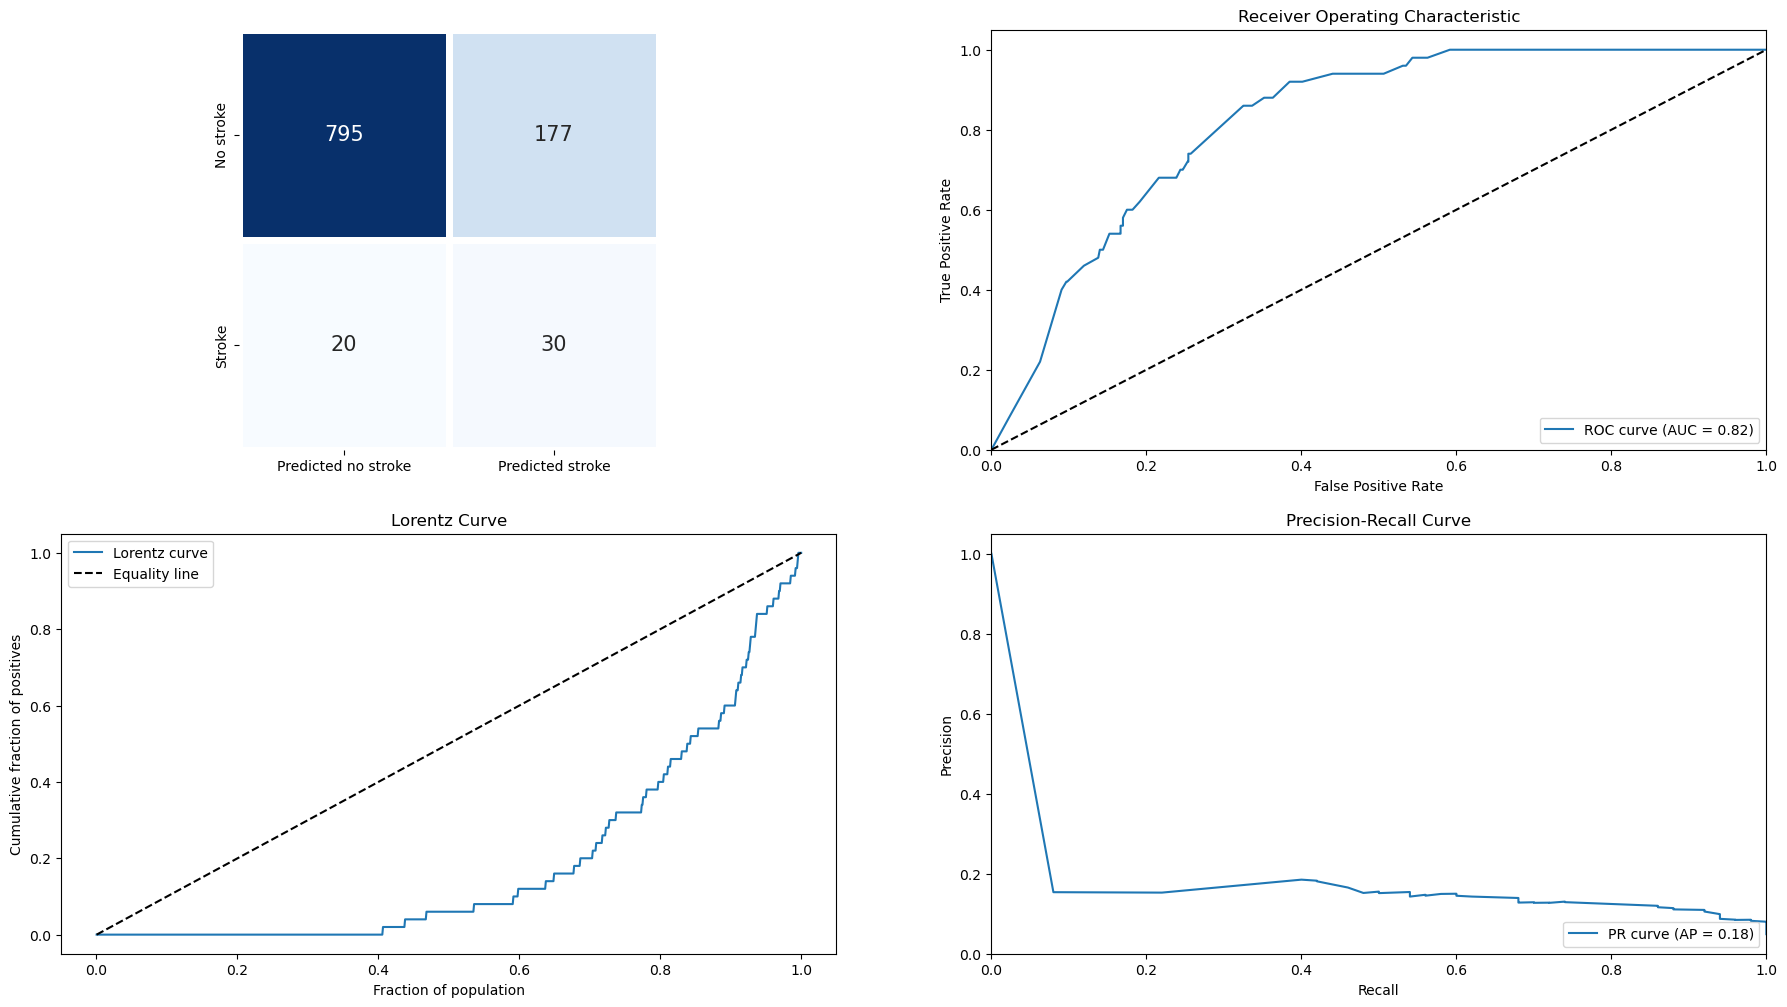

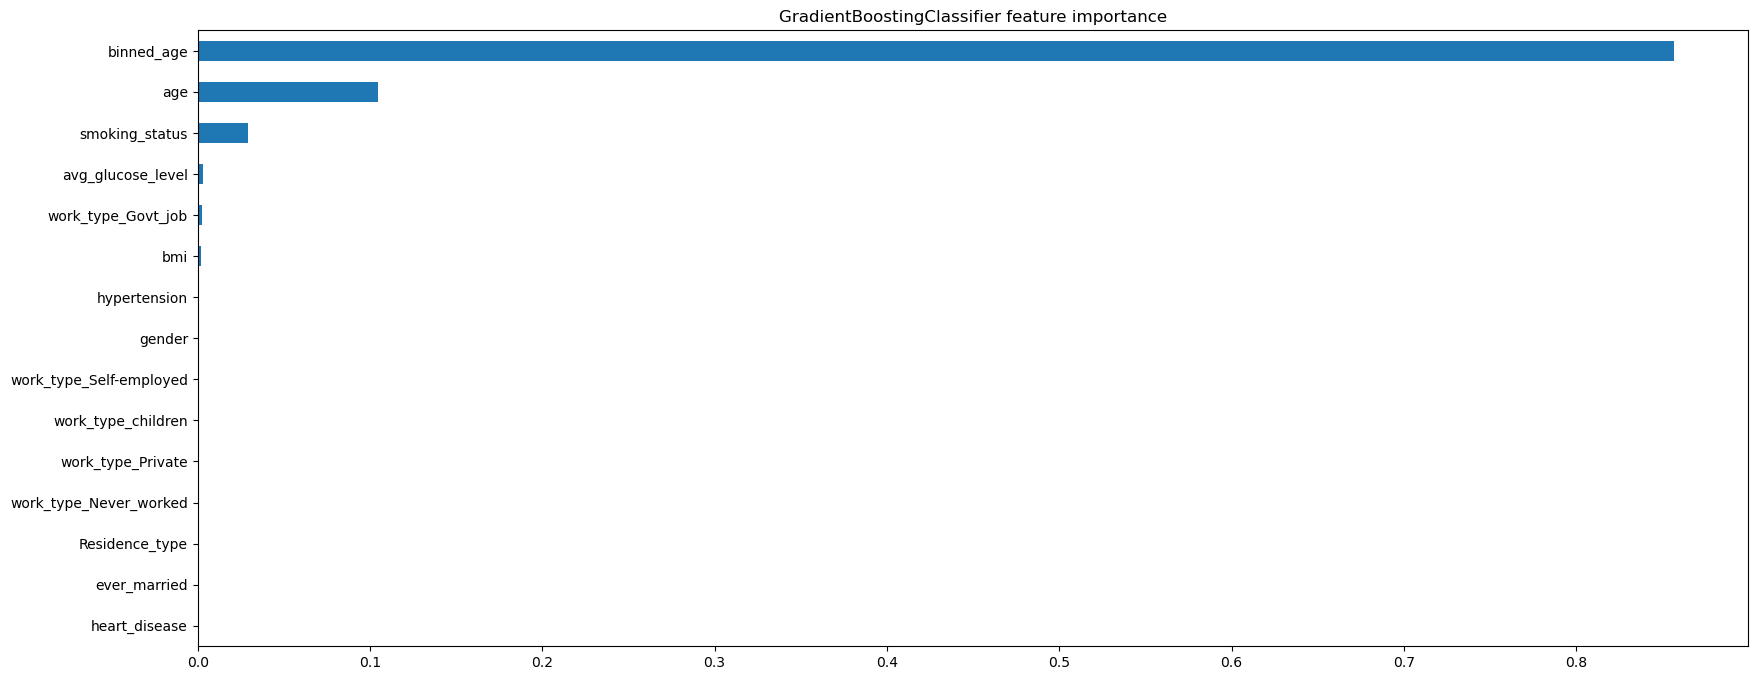

Model:  XGBClassifier
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 30}
Best score:  0.9217970998627539
cost time is   3.290081024169922
train accuracy:  0.9385288065843621
test accuracy:  0.8767123287671232
[[875  97]
 [ 29  21]]
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       972
           1       0.18      0.42      0.25        50

    accuracy                           0.88      1022
   macro avg       0.57      0.66      0.59      1022
weighted avg       0.93      0.88      0.90      1022



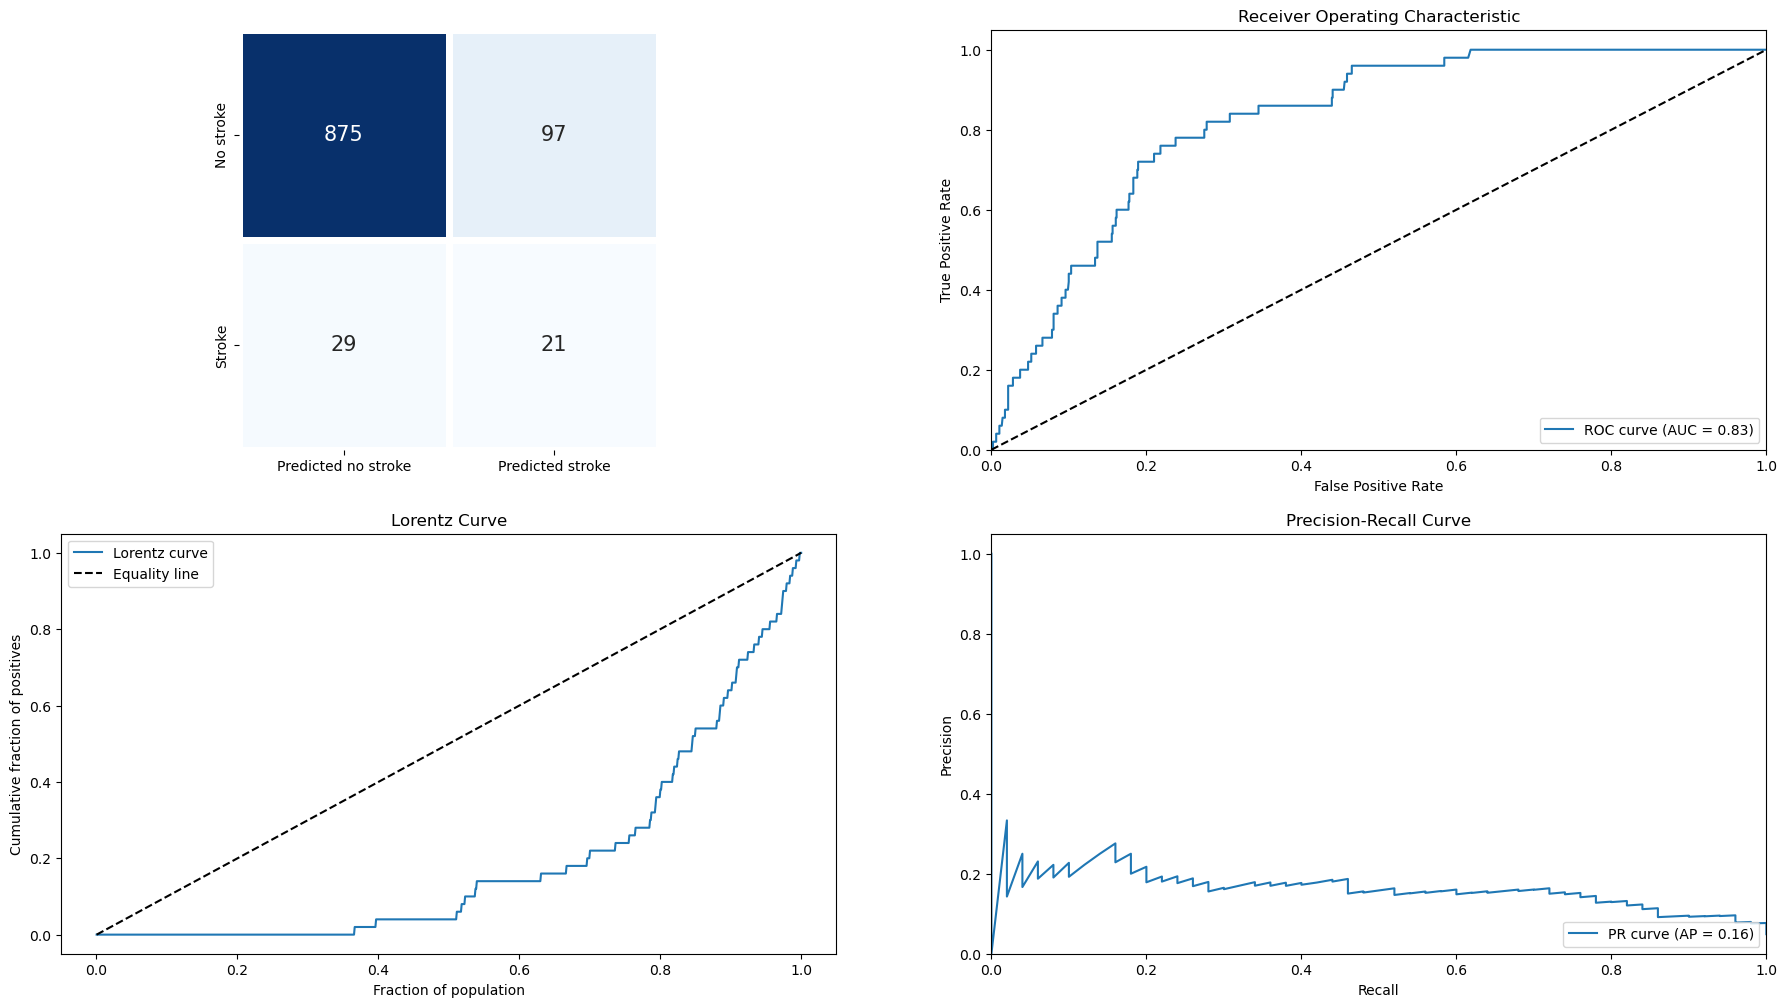

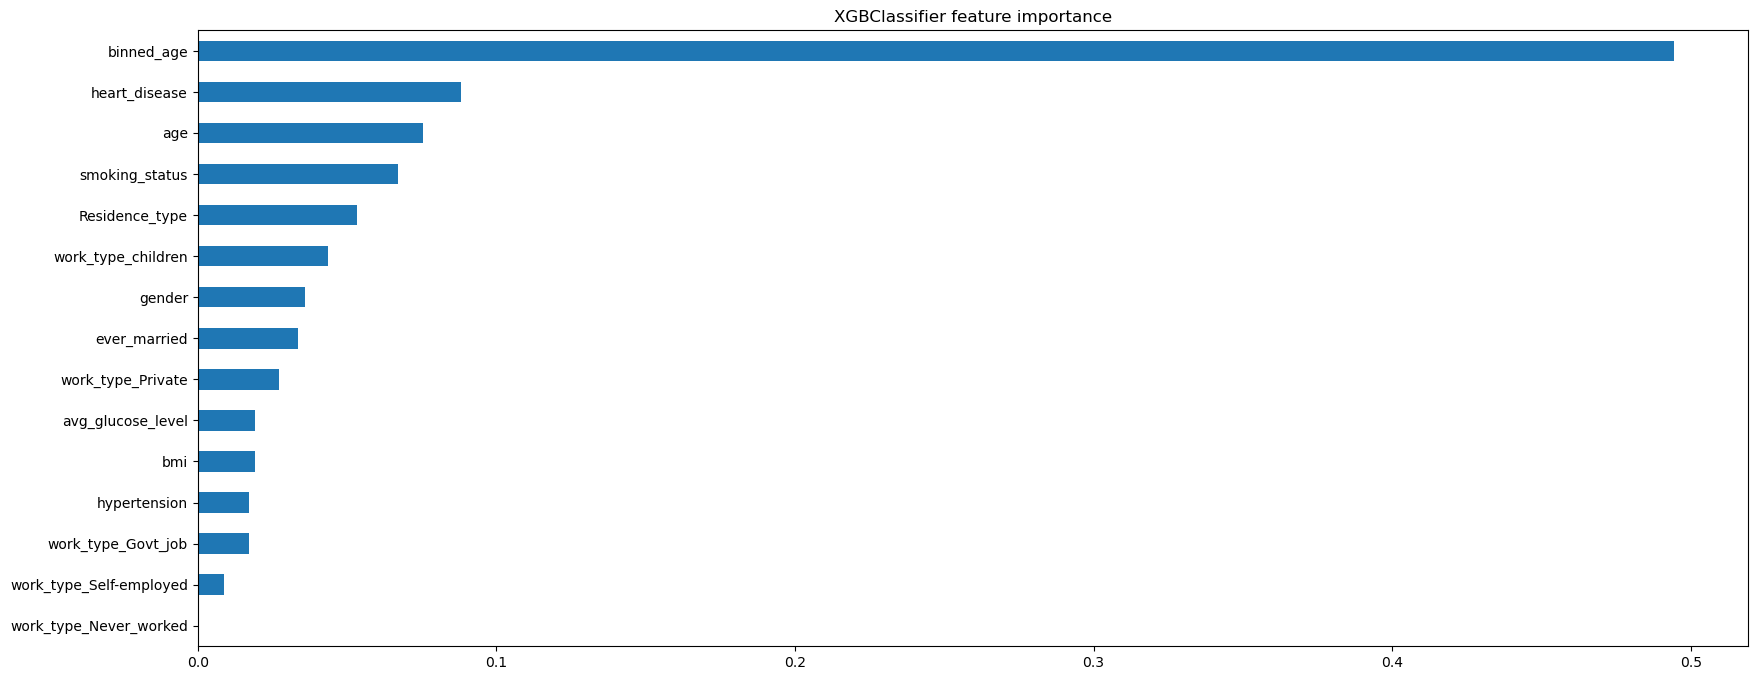

Model:  CatBoostClassifier
Best parameters:  {'iterations': 100, 'learning_rate': 0.1}
Best score:  0.9226641141257405
cost time is   4.470452070236206
train accuracy:  0.936085390946502
test accuracy:  0.9031311154598826
[[908  64]
 [ 35  15]]
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       972
           1       0.19      0.30      0.23        50

    accuracy                           0.90      1022
   macro avg       0.58      0.62      0.59      1022
weighted avg       0.93      0.90      0.91      1022



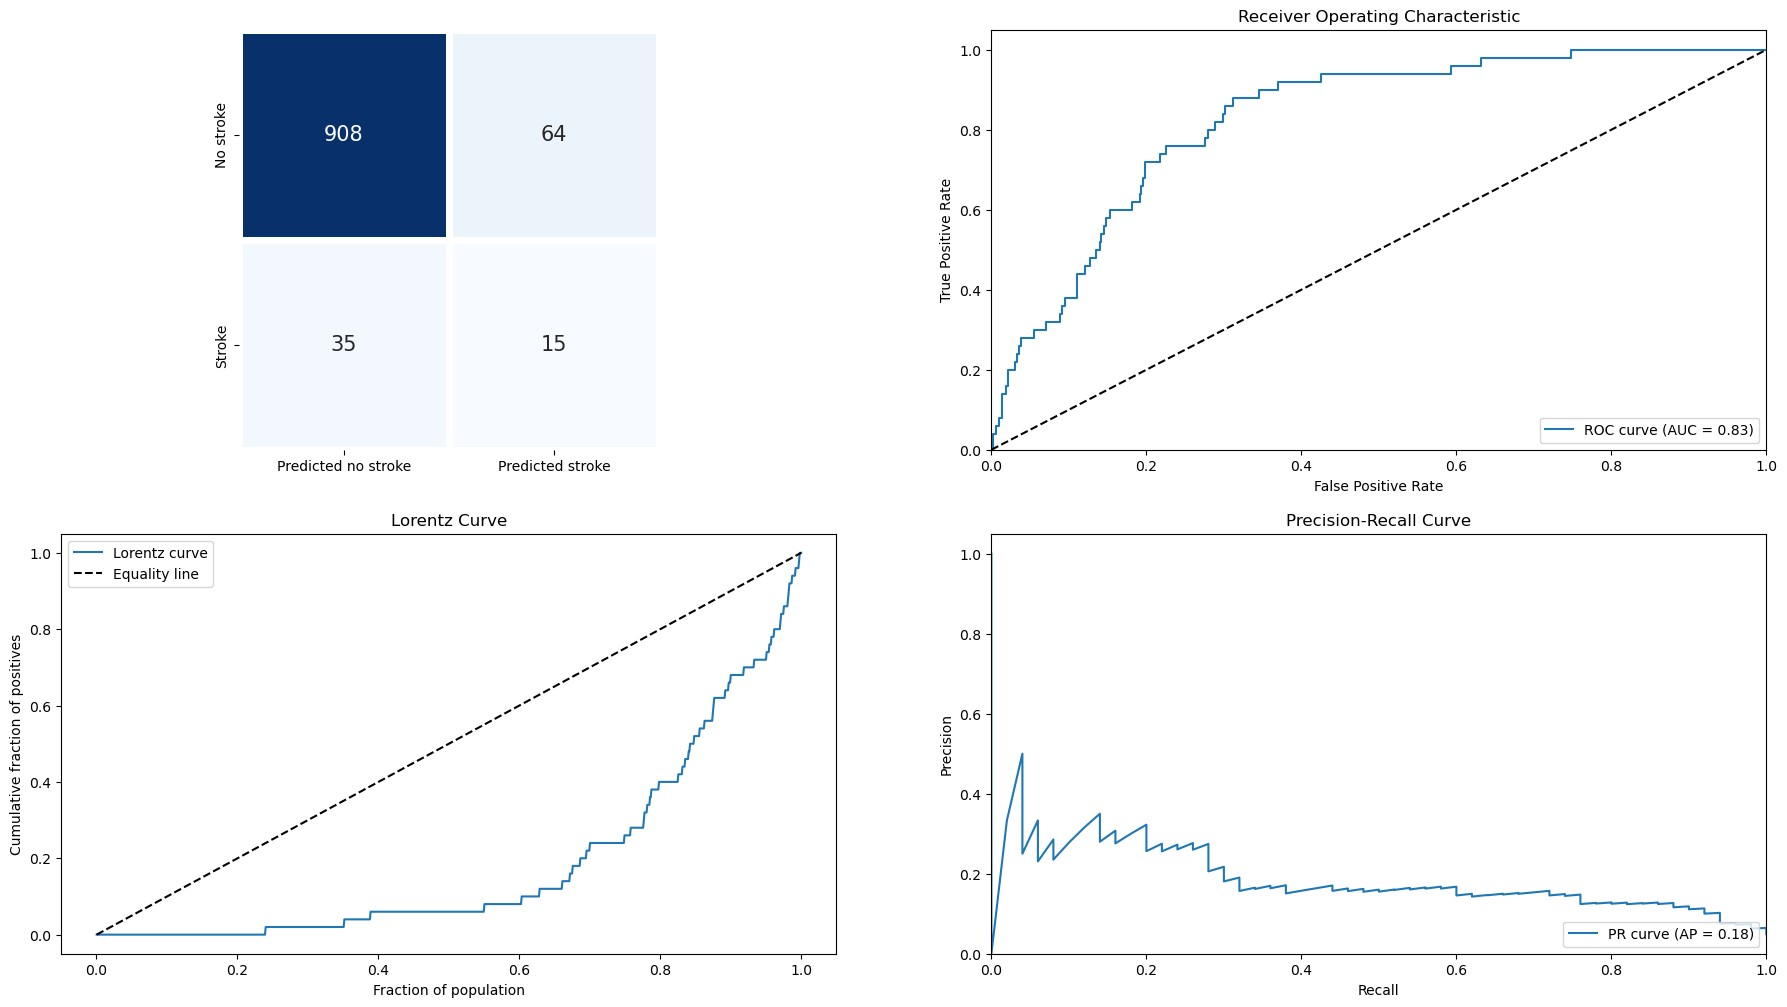

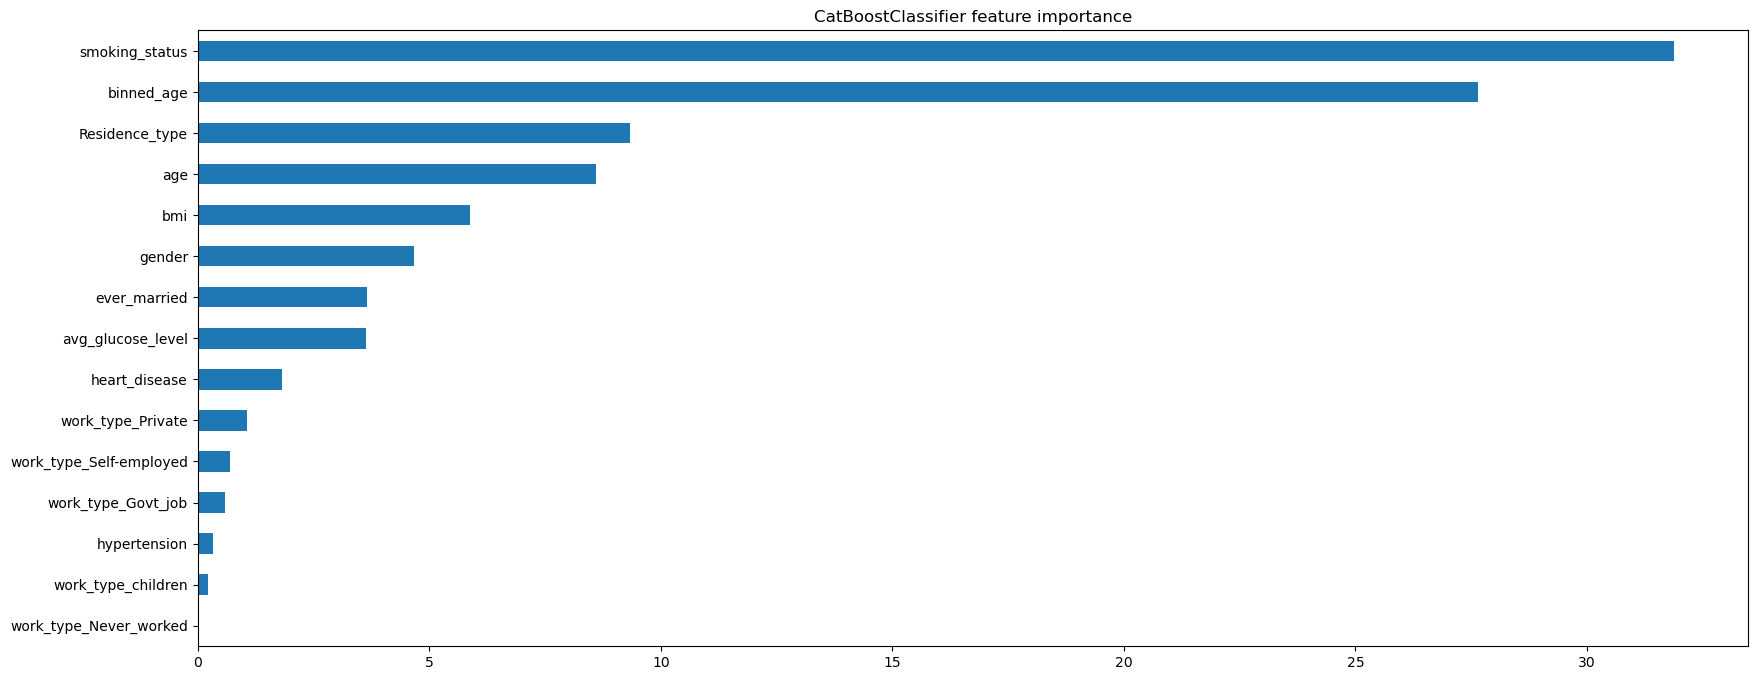

Model:  LGBMClassifier
Best parameters:  {'learning_rate': 0.1, 'n_estimators': 15}
Best score:  0.9128007438069267
cost time is   1.2648091316223145
train accuracy:  0.9278549382716049
test accuracy:  0.8845401174168297
[[884  88]
 [ 30  20]]
              precision    recall  f1-score   support

           0       0.97      0.91      0.94       972
           1       0.19      0.40      0.25        50

    accuracy                           0.88      1022
   macro avg       0.58      0.65      0.60      1022
weighted avg       0.93      0.88      0.90      1022



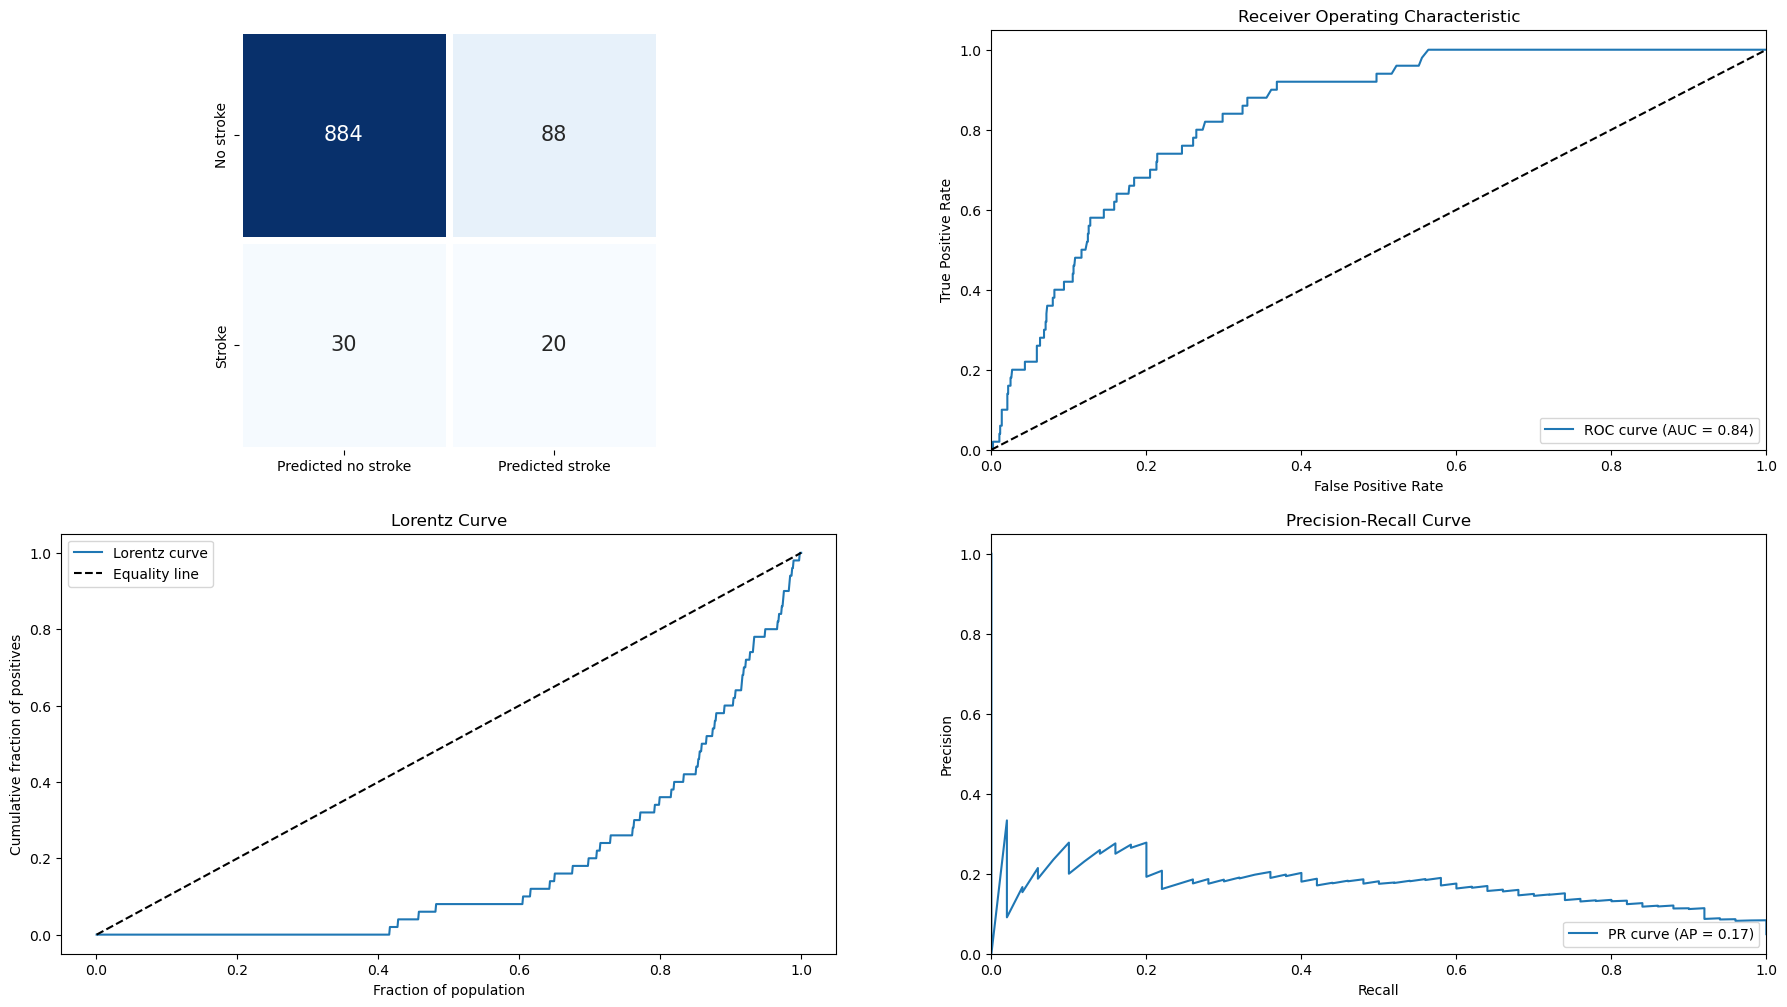

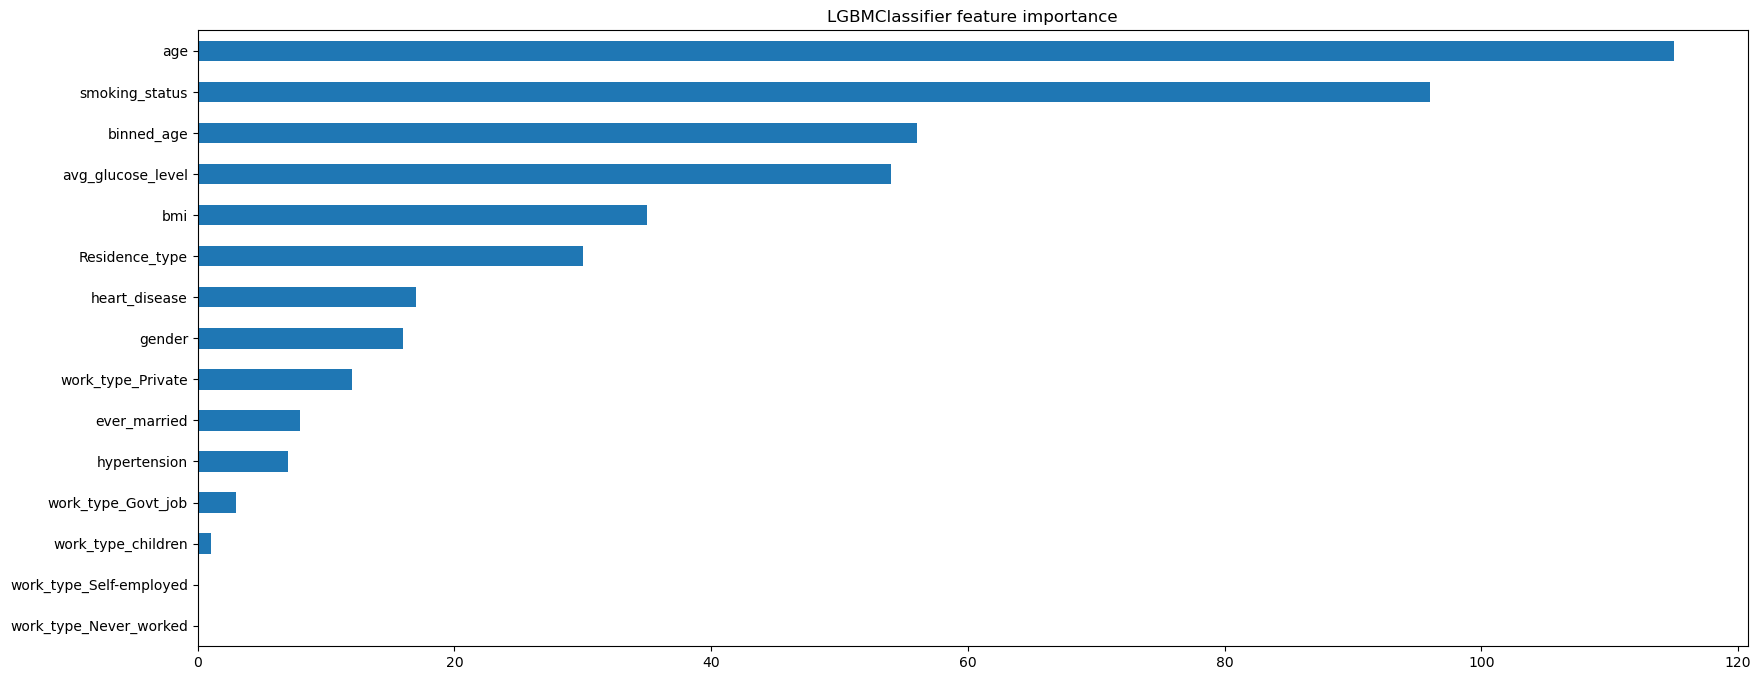

Model:  DecisionTreeClassifier
Best parameters:  {'max_depth': 9, 'min_samples_split': 2}
Best score:  0.9007557186520234
cost time is   0.8912172317504883
train accuracy:  0.9309413580246914
test accuracy:  0.8639921722113503
[[861 111]
 [ 28  22]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       972
           1       0.17      0.44      0.24        50

    accuracy                           0.86      1022
   macro avg       0.57      0.66      0.58      1022
weighted avg       0.93      0.86      0.89      1022



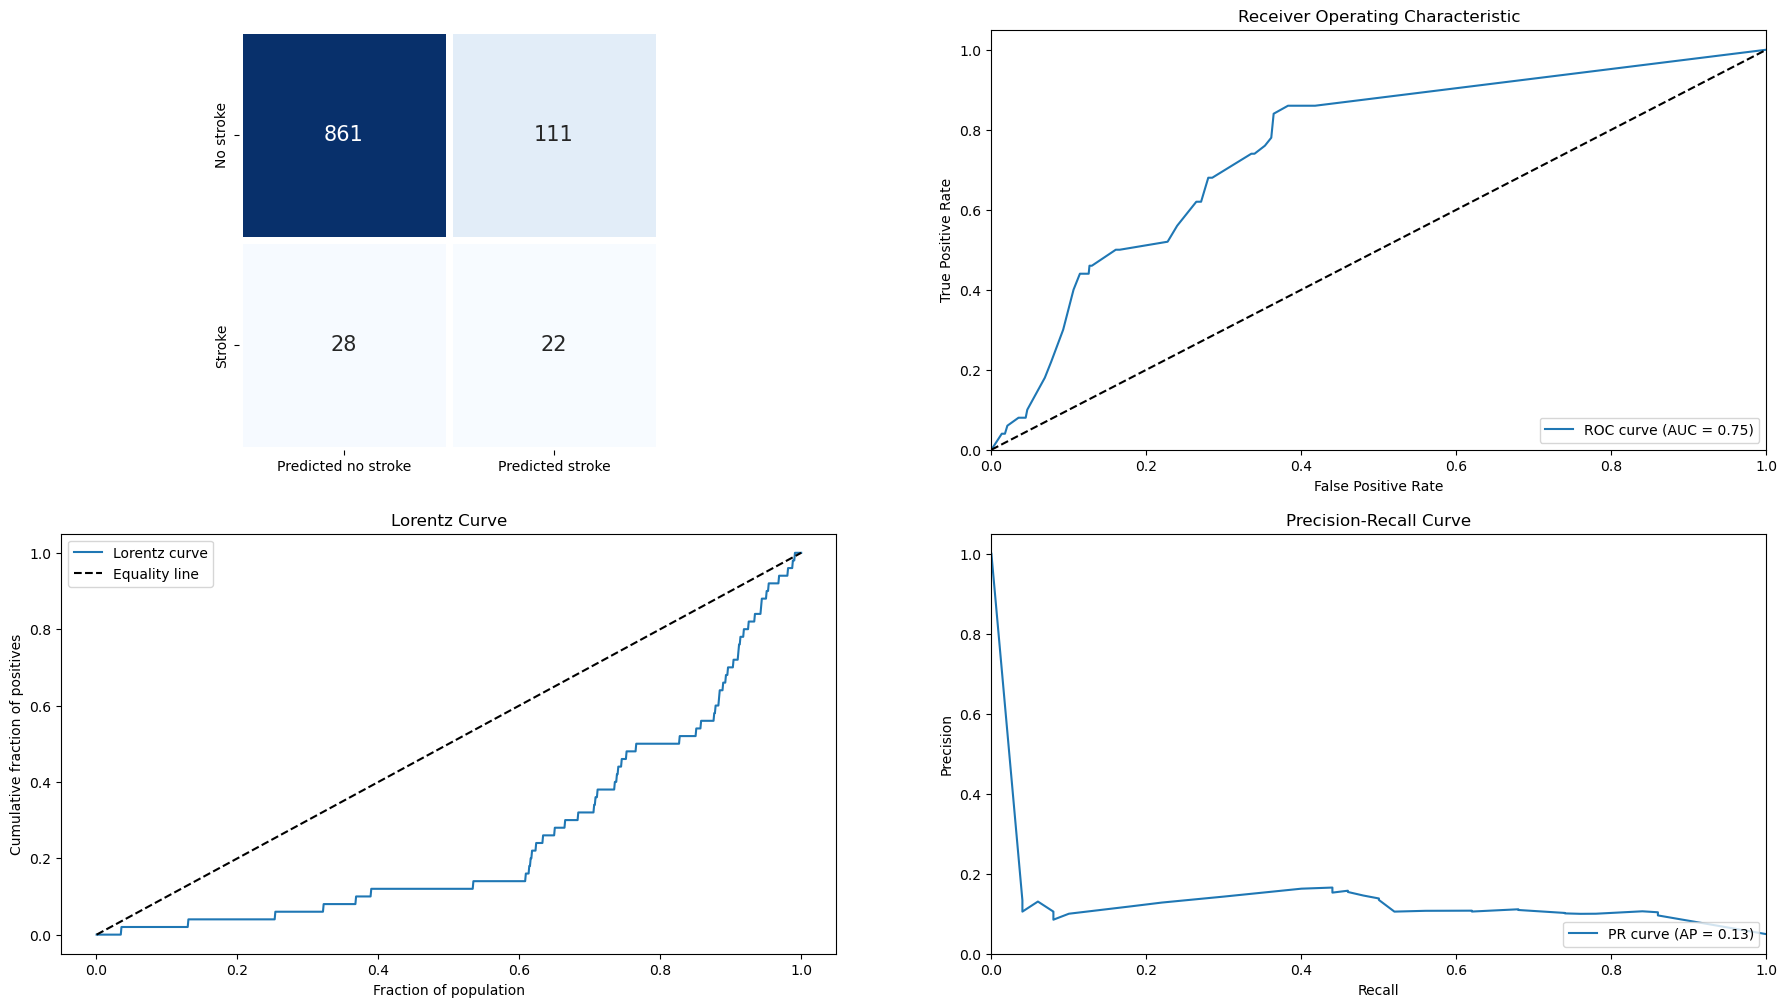

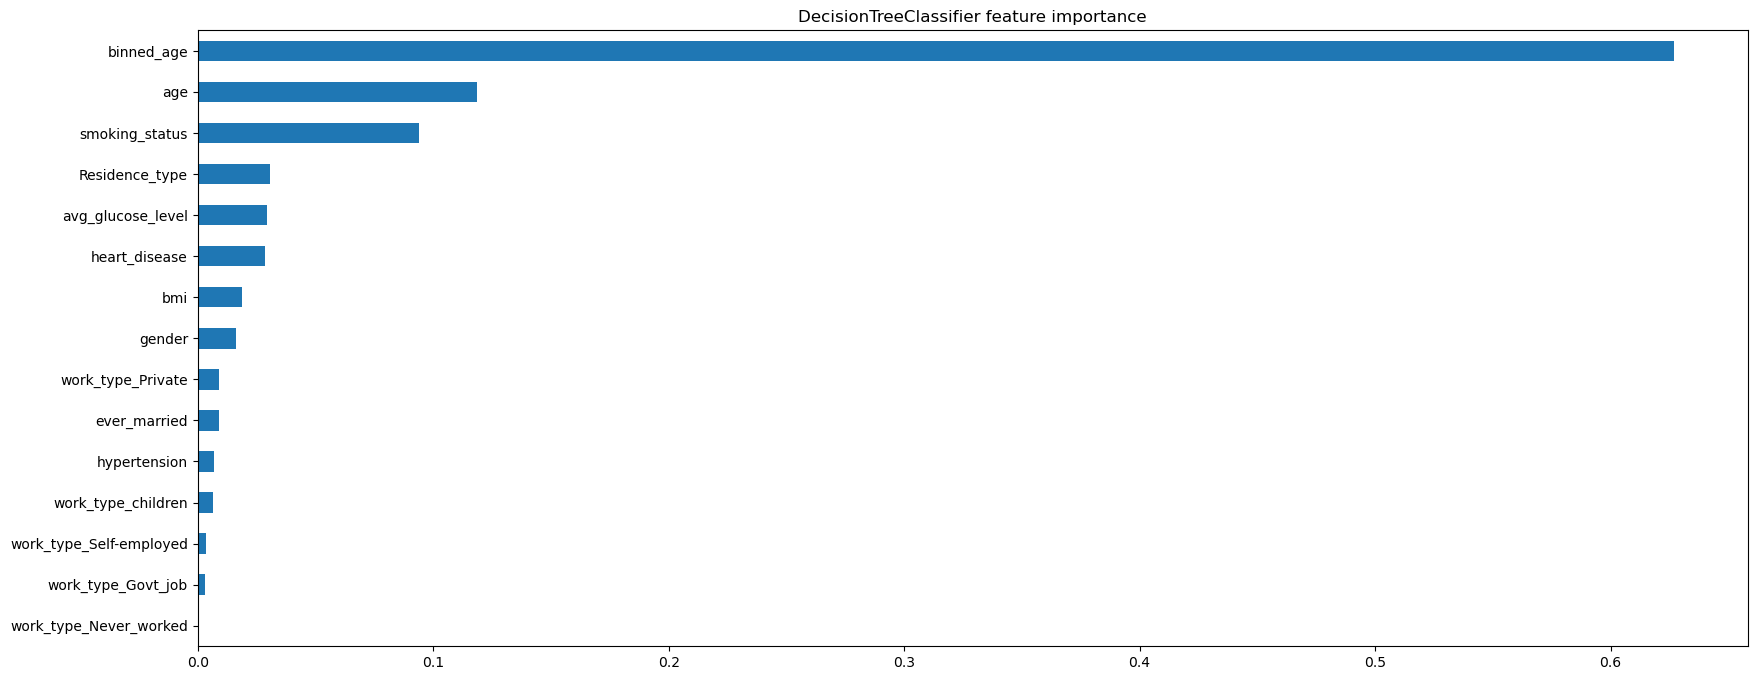

Model:  RandomForestClassifier
Best parameters:  {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 20}
Best score:  0.9132916997078248
cost time is   7.371104001998901
train accuracy:  0.9372427983539094
test accuracy:  0.8561643835616438
[[853 119]
 [ 28  22]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       972
           1       0.16      0.44      0.23        50

    accuracy                           0.86      1022
   macro avg       0.56      0.66      0.58      1022
weighted avg       0.93      0.86      0.89      1022



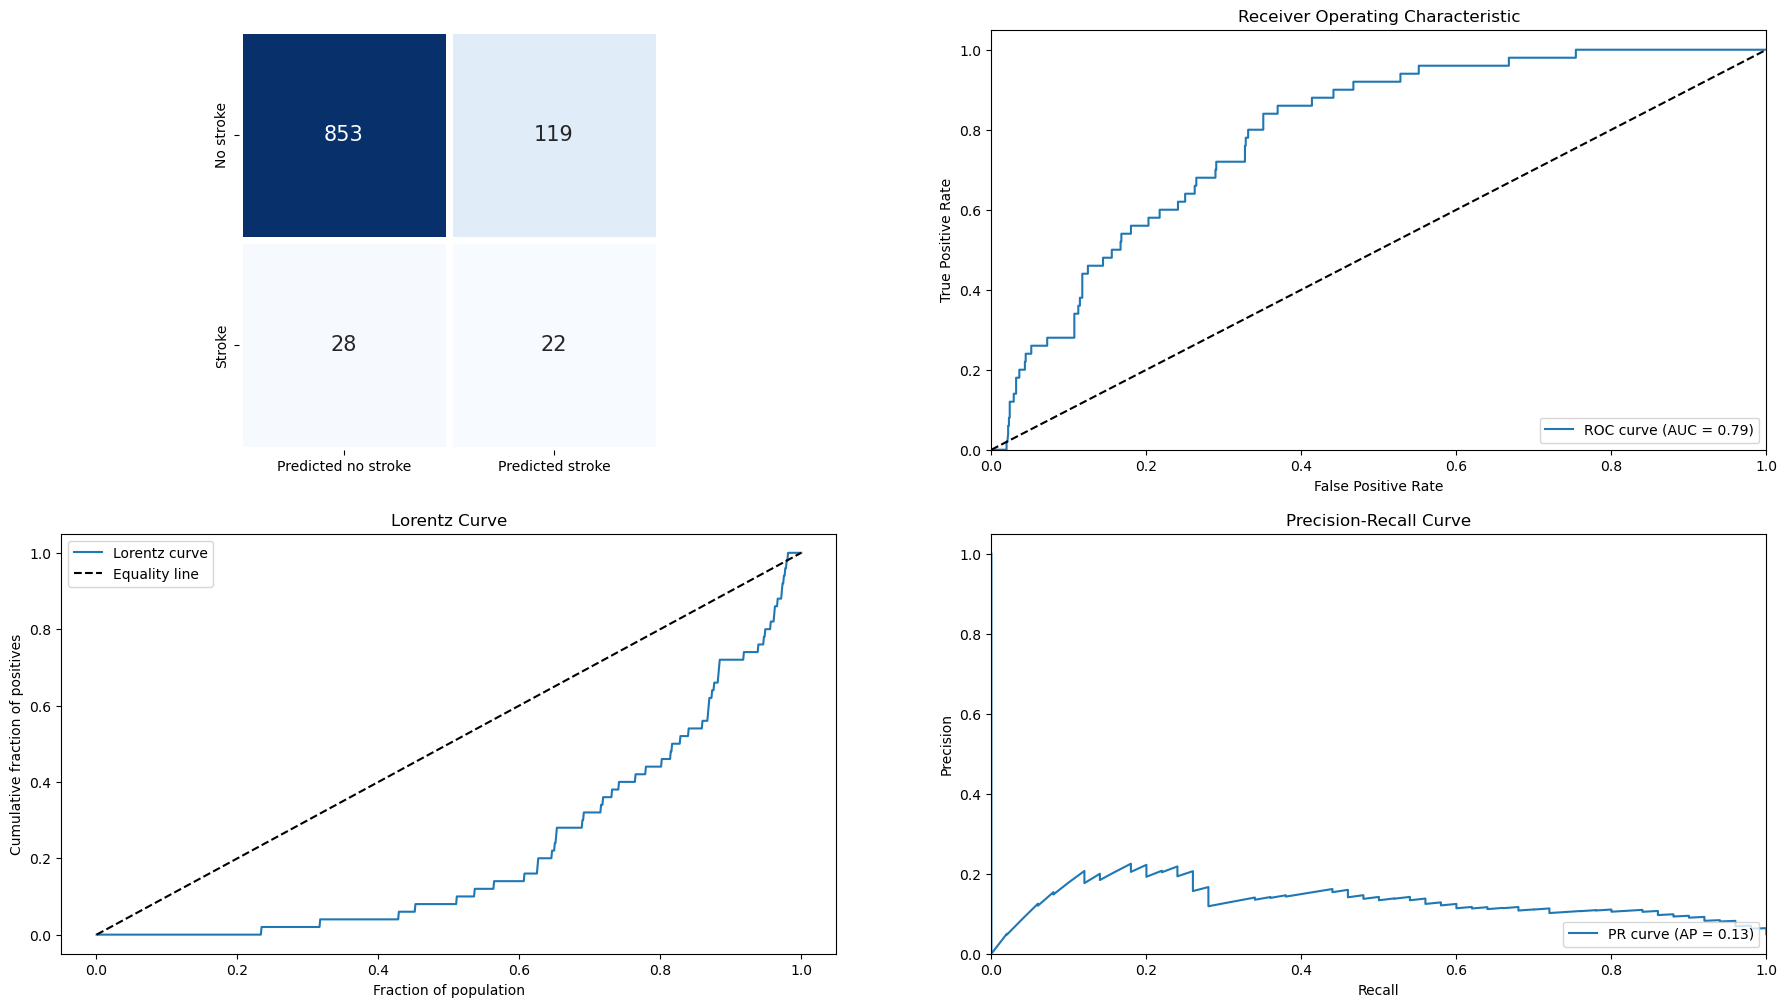

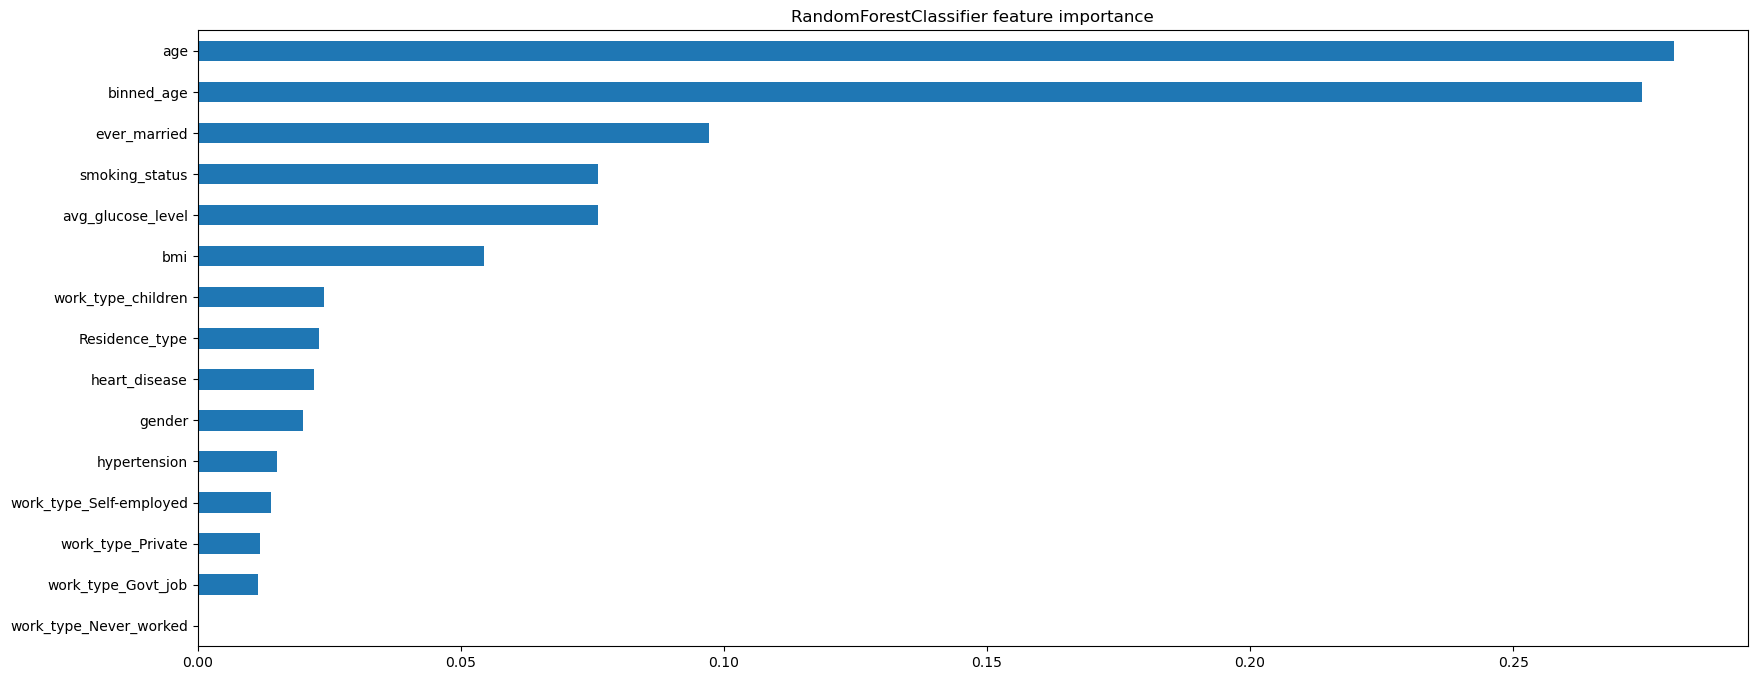

Model:  LogisticRegression
Best parameters:  {'max_iter': 50}
Best score:  0.8021025641784589
cost time is   0.2939438819885254
train accuracy:  0.8041409465020576
test accuracy:  0.7426614481409002
[[724 248]
 [ 15  35]]
              precision    recall  f1-score   support

           0       0.98      0.74      0.85       972
           1       0.12      0.70      0.21        50

    accuracy                           0.74      1022
   macro avg       0.55      0.72      0.53      1022
weighted avg       0.94      0.74      0.82      1022



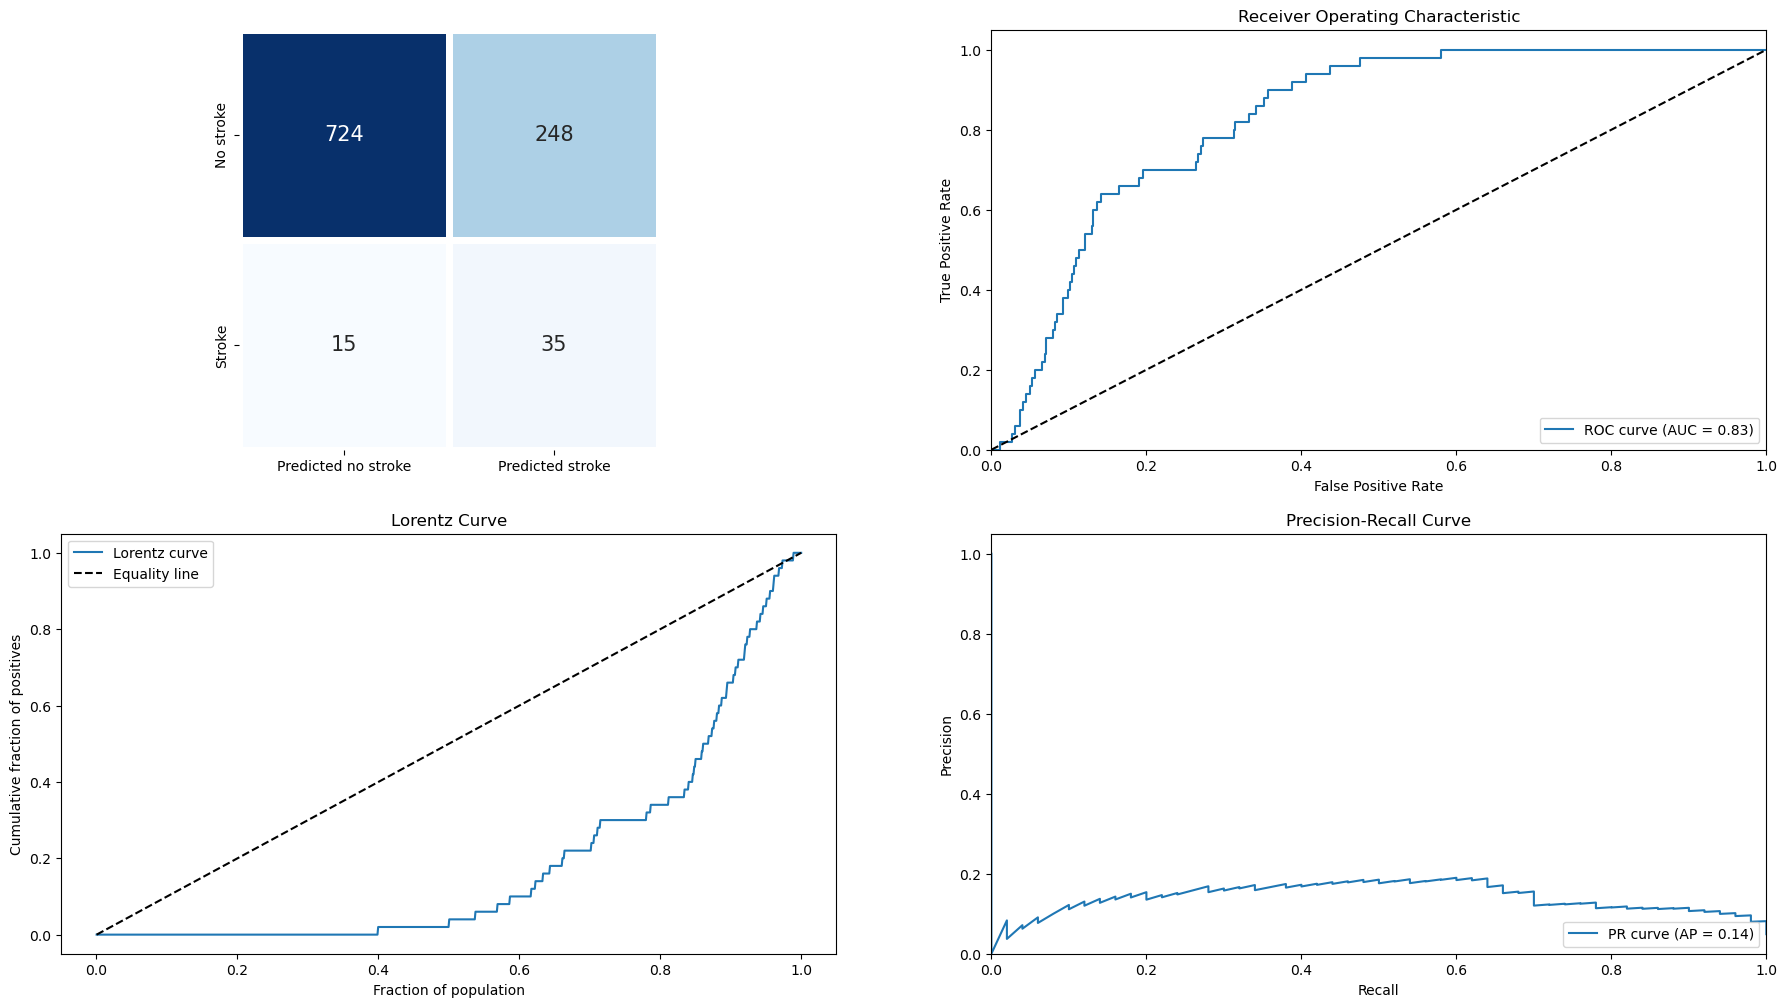

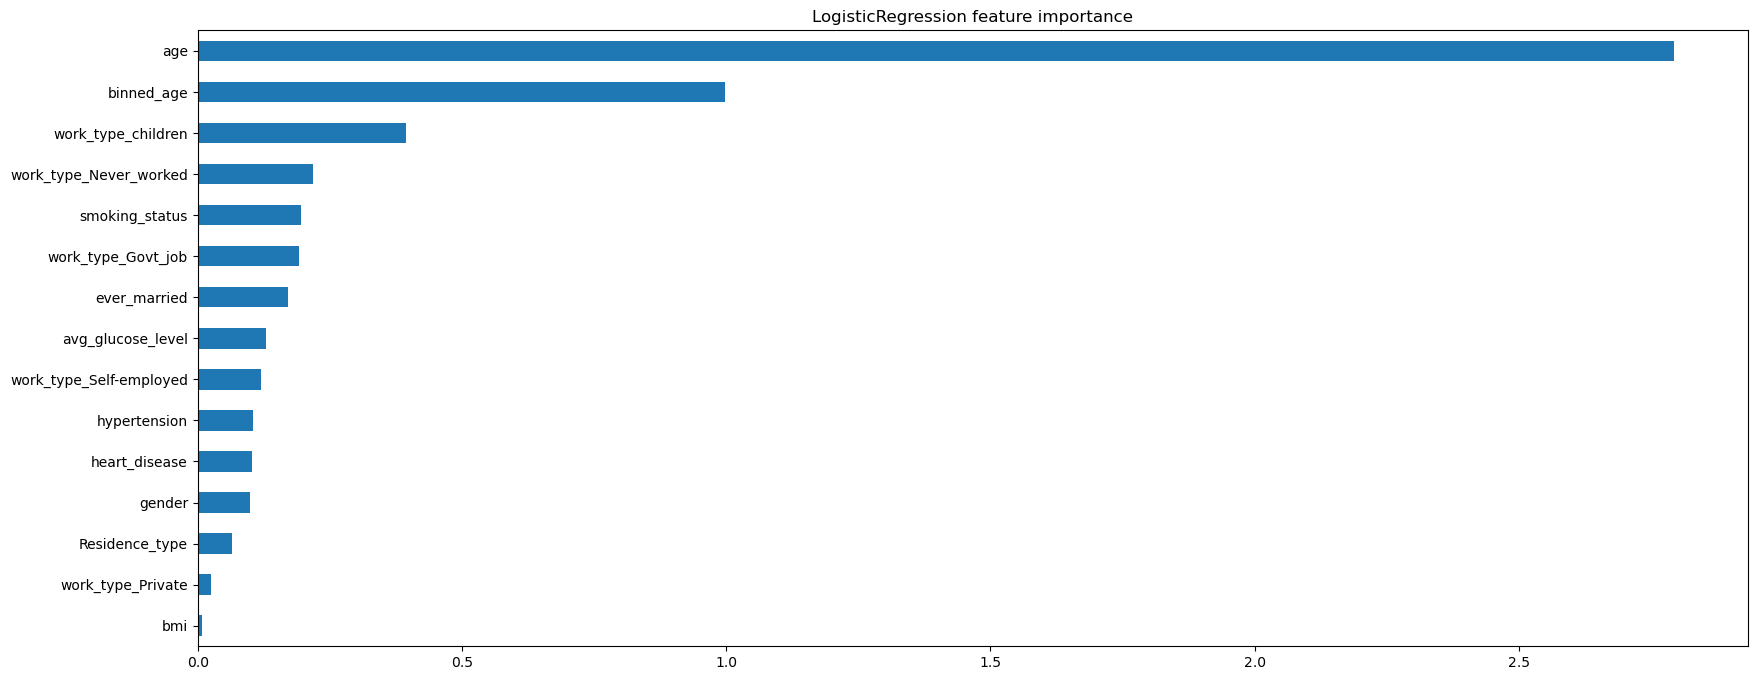

In [60]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score
from sklearn.metrics import accuracy_score
import time
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# define list for results
s_list = []
p_list = []
r_list = []
f1_list = []
f1_binary_list = []
t_list = []

# Define a list of models
models = [
    GradientBoostingClassifier(),
    XGBClassifier(),
    CatBoostClassifier(logging_level='Silent'),
    LGBMClassifier(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    LogisticRegression(),
]

# Define the parameter dictionary corresponding to each model
params = [
    # GBM parameter
    {
        'n_estimators': [5, 7, 9],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    # XgBoost parameter
    {
        'n_estimators': [10, 20, 30],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    # CatBoost parameter
    {
        'iterations': [10, 50, 100],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    # LightGBM parameter
    {
        'n_estimators': [5, 10, 15],
        'learning_rate': [0.1, 0.01, 0.001]
    },
    # Decision Tree parameter
    {
        'max_depth': [5, 7, 9],
        'min_samples_split': [2, 5, 10]
    },
    # Random Forest parameter
    {
        'n_estimators': [10, 20, 30],
        'max_depth': [5, 10],
        'min_samples_split': [2, 5, 10]
    },
    # logistic regression param
    {
        "max_iter": [50, 100]
    }
]

for model, param in zip(models, params):
    # changed scoring to f1 macro
    grid_search = GridSearchCV(estimator=model, param_grid=param, cv=5, scoring="f1_macro")
    start = time.time()
    grid_search.fit(X_train, y_train)
    end = time.time()
    t = end - start

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    print("Model: ", type(model).__name__)
    print("Best parameters: ", best_params)
    print("Best score: ", best_score)
    print("cost time is  ", t)

    best_model = grid_search.best_estimator_
    train_pre = best_model.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pre)
    test_pre = best_model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pre)
    print('train accuracy: ', train_accuracy)
    print('test accuracy: ', test_accuracy)

    ret = classification_report(y_test, test_pre)
    print(confusion_matrix(y_test, test_pre))
    print(ret)
    s_list.append(accuracy_score(y_test, test_pre))
    p_list.append(precision_score(y_test, test_pre))
    r_list.append(recall_score(y_test, test_pre))
    f1_list.append(f1_score(y_test, test_pre, average='macro')) # average='binary',
    f1_binary_list.append(f1_score(y_test, test_pre, average='binary'))
    t_list.append(t)
    plot_roc_auc_pr(best_model)


In [61]:
compare_data = pd.DataFrame(
    data={'accuracy': s_list, 'precision': p_list, "recall": r_list, 'f1_macro_score': f1_list, 'f1_binary_list': f1_binary_list,'time': t_list},
    index=['GBM', 'XgBoost', 'CatBoost', 'LightGBM', 'Decision Tree', 'Random Forest', 'Logistic Regression'])
compare_data

,accuracy,precision,recall,f1_macro_score,f1_binary_list,time
GBM,0.807241,0.144928,0.60,0.561611,0.233463,3.282102
XgBoost,0.876712,0.177966,0.42,0.591418,0.250000,3.290081
CatBoost,0.903131,0.189873,0.30,0.590431,0.232558,4.470452
LightGBM,0.884540,0.185185,0.40,0.595299,0.253165,1.264809
Decision Tree,0.863992,0.165414,0.44,0.582873,0.240437,0.891217
Random Forest,0.856164,0.156028,0.44,0.575518,0.230366,7.371104
Logistic Regression,0.742661,0.123675,0.70,0.528249,0.210210,0.293944


In [62]:
# compare_data.to_clipboard()

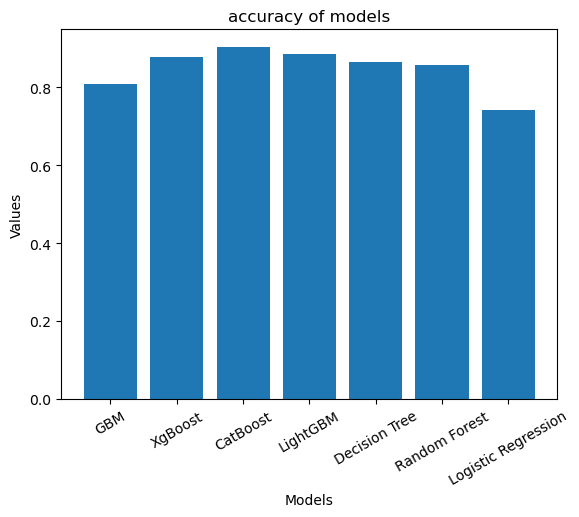

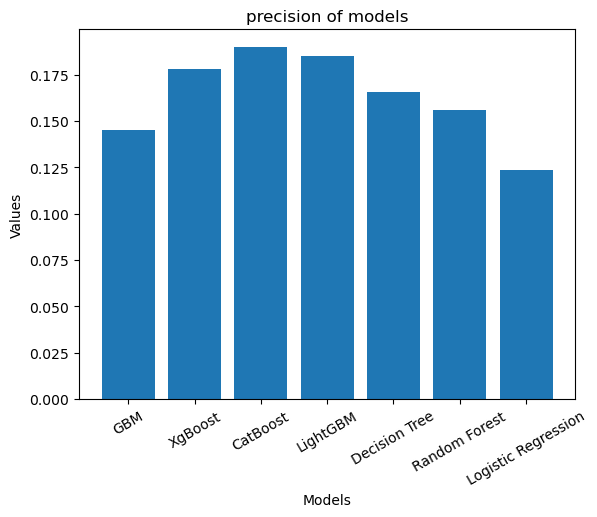

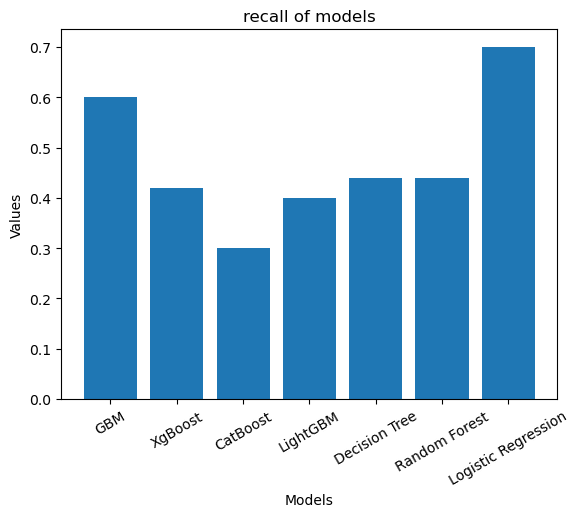

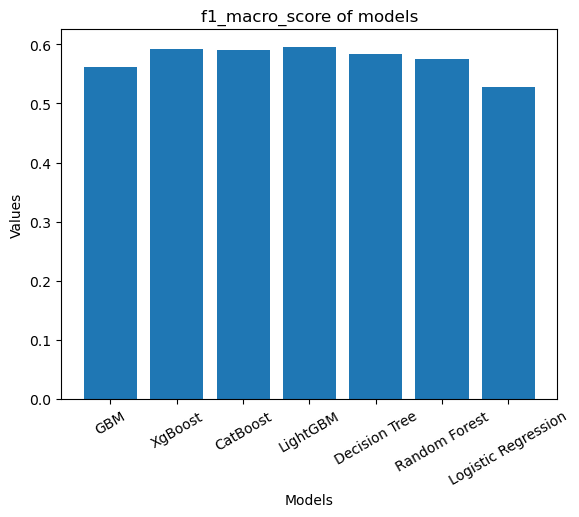

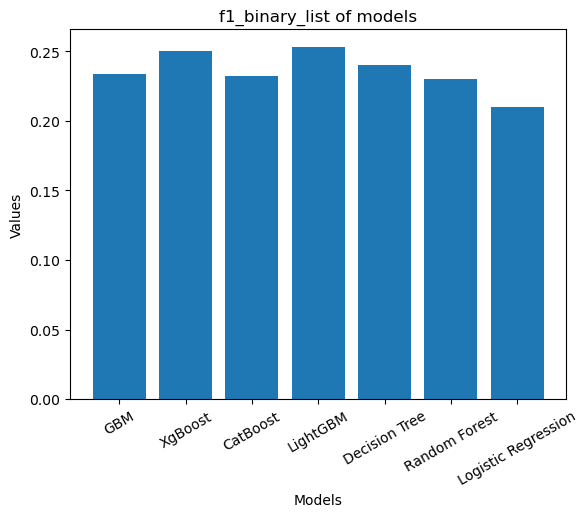

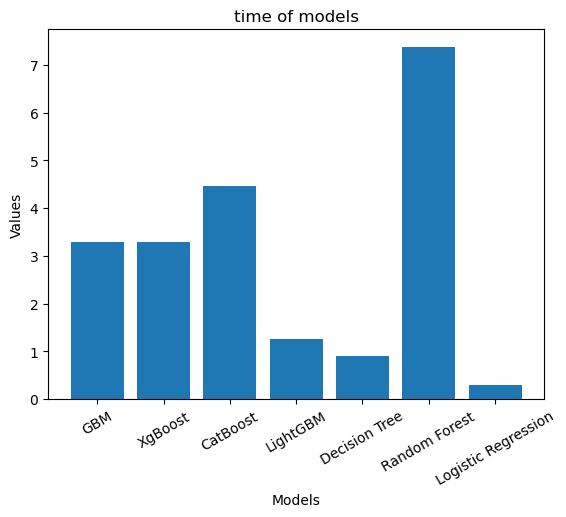

In [63]:
import matplotlib.pyplot as plt

index = compare_data.index
for col in compare_data.columns:
    column1 = compare_data[col]
    plt.figure()
    plt.bar(index, column1)
    plt.title(f'{col} of models')
    plt.xlabel('Models')
    plt.ylabel('Values')
    # Customize the x-axis tick labels
    custom_labels = ['GBM', 'XgBoost', 'CatBoost', 'LightGBM', 'Decision Tree', 'Random Forest', 'Logistic Regression']
    plt.xticks(index, custom_labels, rotation=30)
    plt.show()
    